In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
customers_df =  pd.read_csv("customer_dim.csv", encoding= 'latin1')
customers_df.head()

,coustomer_key,name,contact_no,nid
0,C000001,sumit,8801920345851,7505075708899
1,C000002,tammanne,8801817069329,1977731324842
2,C000003,kailash kumar,8801663795774,3769494056318
3,C000004,bhagwati prasad,8801533627961,9378834712725
4,C000005,ajay,8801943715786,3540815556323


In [3]:
customers_df.shape

(9191, 4)

In [4]:
customers_df['coustomer_key'].nunique()

9191

In [5]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9191 entries, 0 to 9190
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   coustomer_key  9191 non-null   object
 1   name           9164 non-null   object
 2   contact_no     9191 non-null   int64 
 3   nid            9191 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 287.3+ KB


In [6]:
fact_df =  pd.read_csv("fact_table.csv", encoding= 'latin1')
fact_df.head()

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0


In [7]:
fact_df.shape

(1000000, 9)

In [8]:
fact_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   payment_key    1000000 non-null  object 
 1   coustomer_key  1000000 non-null  object 
 2   time_key       1000000 non-null  object 
 3   item_key       1000000 non-null  object 
 4   store_key      1000000 non-null  object 
 5   quantity       1000000 non-null  int64  
 6   unit           996277 non-null   object 
 7   unit_price     1000000 non-null  float64
 8   total_price    1000000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 68.7+ MB


In [9]:
fact_df.describe()

,quantity,unit_price,total_price
count,1000000.000000,1000000.000000,1000000.000000
mean,6.000185,17.561602,105.401436
std,3.161932,8.637097,80.829301
min,1.000000,6.000000,6.000000
25%,3.000000,13.000000,47.250000
50%,6.000000,16.000000,90.000000
75%,9.000000,20.000000,144.000000
max,11.000000,55.000000,605.000000


In [10]:
item_df = pd.read_csv("item_dim.csv", encoding= 'latin1')
item_df.head()

,item_key,item_name,desc,unit_price,man_country,supplier,unit
0,I00001,A&W Root Beer - 12 oz cans,a. Beverage - Soda,11.50,Netherlands,Bolsius Boxmeer,cans
1,I00002,A&W Root Beer Diet - 12 oz cans,a. Beverage - Soda,6.75,poland,CHROMADURLIN S.A.S,cans
2,I00003,Barq's Root Beer - 12 oz cans,a. Beverage - Soda,6.75,Bangladesh,DENIMACH LTD,cans
3,I00004,Cherry Coke 12oz,a. Beverage - Soda,6.75,Netherlands,Bolsius Boxmeer,cans
4,I00005,Cherry Coke Zero 12 pack,a. Beverage - Soda,6.75,Finland,HARDFORD AB,cans


In [11]:
# clean desc- trailing space
item_df.loc[item_df['desc'] == 'Beverage - Energy/Protein ', 'desc'] = 'Beverage - Energy/Protein'
item_df.loc[item_df['desc'] == 'a. Beverage - Soda', 'desc'] = 'Beverage - Soda'
item_df.loc[item_df['desc'] == 'a. Beverage Sparkling Water'] = 'Beverage Sparkling Water'


C:\Users\CiciA\AppData\Local\Temp\ipykernel_46352\3783847417.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Beverage Sparkling Water' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  item_df.loc[item_df['desc'] == 'a. Beverage Sparkling Water'] = 'Beverage Sparkling Water'


In [12]:
item_df.shape

(264, 7)

In [13]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   item_key     264 non-null    object
 1   item_name    264 non-null    object
 2   desc         264 non-null    object
 3   unit_price   264 non-null    object
 4   man_country  264 non-null    object
 5   supplier     264 non-null    object
 6   unit         263 non-null    object
dtypes: object(7)
memory usage: 14.6+ KB


In [14]:
# desc- small categories 
item_df.groupby('desc').count().index

Index(['Beverage - Energy/Protein', 'Beverage - Gatorade',
       'Beverage - Iced Tea', 'Beverage - Juice', 'Beverage - Soda',
       'Beverage Sparkling Water', 'Beverage Water', 'Coffee Cream',
       'Coffee Creamer', 'Coffee Ground', 'Coffee Hot Cocoa', 'Coffee K-Cups',
       'Coffee K-Cups Tea', 'Coffee Stirrers', 'Coffee Sweetener',
       'Dishware - Bowls', 'Dishware - Cups Cold', 'Dishware - Cups Hot',
       'Dishware - Plates', 'Dishware - Utensils', 'Food - Chips',
       'Food - Chocolate', 'Food - Healthy', 'Food - Nuts', 'Food - Snacks',
       'Food - Sweets', 'Gum - Mints', 'Kitchen Supplies', 'Medicine'],
      dtype='object', name='desc')

In [15]:
item_df.groupby('desc').agg({'item_name': ', '.join,'unit':'count'}).reset_index()
# healthy food: biscuits, oats, yogurts, bars, cheese

,desc,item_name,unit
0,Beverage - Energy/Protein,"Monster Java 15 oz, Monster Lo-Carb 16 oz, Mon...",14
1,Beverage - Gatorade,"G2 Lo Calorie Variety 20 oz, Gatorade Frost Va...",10
2,Beverage - Iced Tea,"Brisk Lemon Iced Tea - 12 oz cans, Diet Fuze I...",7
3,Beverage - Juice,"100% Juice Box Variety 6.75 oz , Ocean Spray C...",7
4,Beverage - Soda,"A&W Root Beer - 12 oz cans, A&W Root Beer Diet...",29
5,Beverage Sparkling Water,"Beverage Sparkling Water, Beverage Sparkling W...",21
6,Beverage Water,"AquaFina Purified Drinking Water 16oz, Dasani ...",9
7,Coffee Cream,"Coffee-Mate French Vanilla Cold, Coffee-Mate O...",6
8,Coffee Creamer,"Njoy Creamer Canister 16 oz, Njoy Creamer Packs",2
9,Coffee Ground,"Community Coffee Dark Roast, Dunkin Donuts Ori...",5


In [16]:
# create a big cateogry 
def categorize(x):
    words = x.split()
    if words[0] == 'Beverage':
        return 'Beverage'
    elif words[0] =='Coffee':
        return 'Coffee'
    elif words[0] == 'Dishware':
        return 'Dishware'
    elif (words[0] == 'Food') | (words[0] == 'Gum'): 
        return 'Food'
    else: 
        return x
    

In [17]:
item_df['category'] = item_df['desc'].apply(categorize)
item_df['category'].unique()

array(['Beverage', 'Coffee', 'Dishware', 'Food', 'Kitchen Supplies',
       'Medicine'], dtype=object)

In [18]:
item_df.groupby('category').count()

# observations: Beverage and Food has most items

,item_key,item_name,desc,unit_price,man_country,supplier,unit
category,,,,,,,
Beverage,97,97,97,97,97,97,97
Coffee,32,32,32,32,32,32,32
Dishware,20,20,20,20,20,20,20
Food,94,94,94,94,94,94,93
Kitchen Supplies,19,19,19,19,19,19,19
Medicine,2,2,2,2,2,2,2


In [19]:
# suppliers eda 
item_df['supplier'].unique()

array(['Bolsius Boxmeer', 'CHROMADURLIN S.A.S', 'DENIMACH LTD',
       'HARDFORD AB', 'BIGSO AB', 'Indo Count Industries Ltd',
       'Friedola 1888 GmbH', 'CHERRY GROUP CO.,LTD', 'MAESA SAS',
       'NINGBO SEDUNO IMP & EXP CO.LTD', 'Beverage Sparkling Water'],
      dtype=object)

In [20]:
item_supplier= item_df.groupby('supplier').agg({'item_name': ', '.join,'desc': ', '.join,'category': ', '.join,'unit':'count'}).reset_index()
item_supplier.loc[:,'desc'] = item_supplier.loc[:,'desc'].apply(lambda x: set(x.split(', ')))
item_supplier.loc[:,'category'] = item_supplier.loc[:,'category'].apply(lambda x: set(x.split(', ')))
item_supplier

,supplier,item_name,desc,category,unit
0,BIGSO AB,"Coke Classic 12 oz cans, Diet Coke - 12 oz can...","{Gum - Mints, Medicine, Food - Healthy, Coffee...","{Beverage, Medicine, Food, Dishware, Coffee, K...",24
1,Beverage Sparkling Water,"Beverage Sparkling Water, Beverage Sparkling W...",{Beverage Sparkling Water},{Beverage},21
2,Bolsius Boxmeer,"A&W Root Beer - 12 oz cans, Cherry Coke 12oz, ...","{Beverage - Iced Tea, Food - Nuts, Coffee Swee...","{Beverage, Food, Dishware, Coffee, Kitchen Sup...",25
3,"CHERRY GROUP CO.,LTD","Diet Dr. Pepper - 12 oz cans, Dr. Pepper - 12 ...","{Gum - Mints, Beverage - Iced Tea, Food - Nuts...","{Beverage, Food, Dishware, Coffee, Kitchen Sup...",13
4,CHROMADURLIN S.A.S,"A&W Root Beer Diet - 12 oz cans, Ginger Ale - ...","{Beverage - Iced Tea, Food - Nuts, Coffee Swee...","{Beverage, Food, Dishware, Coffee, Kitchen Sup...",26
5,DENIMACH LTD,"Barq's Root Beer - 12 oz cans, Monster Zero Ul...","{Dishware - Cups Cold, Food - Nuts, Coffee Swe...","{Beverage, Food, Dishware, Coffee, Kitchen Sup...",31
6,Friedola 1888 GmbH,"Diet Coke Caffeine Free 12oz cans, Hawaiian Pu...","{Beverage - Iced Tea, Food - Nuts, Coffee Swee...","{Beverage, Food, Dishware, Coffee, Kitchen Sup...",30
7,HARDFORD AB,"Cherry Coke Zero 12 pack, Diet Mountain Dew 12...","{Beverage - Soda, Gum - Mints, Coffee Sweetene...","{Beverage, Food, Dishware, Coffee, Kitchen Sup...",24
8,Indo Count Industries Ltd,"Coke Classic 12 oz cans, Coke Zero Sugar 12 oz...","{Beverage - Soda, Gum - Mints, Food - Nuts, Me...","{Beverage, Medicine, Food, Dishware, Coffee}",31
9,MAESA SAS,"Diet Gingerale 12 oz cans, Premier Protein Sha...","{Gum - Mints, Beverage - Iced Tea, Dishware - ...","{Beverage, Food, Dishware, Coffee, Kitchen Sup...",18


In [21]:
item_supplier['count_cat'] = item_supplier['category'].apply(lambda x: len(x))
item_supplier
# 11 suppliers

,supplier,item_name,desc,category,unit,count_cat
0,BIGSO AB,"Coke Classic 12 oz cans, Diet Coke - 12 oz can...","{Gum - Mints, Medicine, Food - Healthy, Coffee...","{Beverage, Medicine, Food, Dishware, Coffee, K...",24,6
1,Beverage Sparkling Water,"Beverage Sparkling Water, Beverage Sparkling W...",{Beverage Sparkling Water},{Beverage},21,1
2,Bolsius Boxmeer,"A&W Root Beer - 12 oz cans, Cherry Coke 12oz, ...","{Beverage - Iced Tea, Food - Nuts, Coffee Swee...","{Beverage, Food, Dishware, Coffee, Kitchen Sup...",25,5
3,"CHERRY GROUP CO.,LTD","Diet Dr. Pepper - 12 oz cans, Dr. Pepper - 12 ...","{Gum - Mints, Beverage - Iced Tea, Food - Nuts...","{Beverage, Food, Dishware, Coffee, Kitchen Sup...",13,5
4,CHROMADURLIN S.A.S,"A&W Root Beer Diet - 12 oz cans, Ginger Ale - ...","{Beverage - Iced Tea, Food - Nuts, Coffee Swee...","{Beverage, Food, Dishware, Coffee, Kitchen Sup...",26,5
5,DENIMACH LTD,"Barq's Root Beer - 12 oz cans, Monster Zero Ul...","{Dishware - Cups Cold, Food - Nuts, Coffee Swe...","{Beverage, Food, Dishware, Coffee, Kitchen Sup...",31,5
6,Friedola 1888 GmbH,"Diet Coke Caffeine Free 12oz cans, Hawaiian Pu...","{Beverage - Iced Tea, Food - Nuts, Coffee Swee...","{Beverage, Food, Dishware, Coffee, Kitchen Sup...",30,5
7,HARDFORD AB,"Cherry Coke Zero 12 pack, Diet Mountain Dew 12...","{Beverage - Soda, Gum - Mints, Coffee Sweetene...","{Beverage, Food, Dishware, Coffee, Kitchen Sup...",24,5
8,Indo Count Industries Ltd,"Coke Classic 12 oz cans, Coke Zero Sugar 12 oz...","{Beverage - Soda, Gum - Mints, Food - Nuts, Me...","{Beverage, Medicine, Food, Dishware, Coffee}",31,5
9,MAESA SAS,"Diet Gingerale 12 oz cans, Premier Protein Sha...","{Gum - Mints, Beverage - Iced Tea, Dishware - ...","{Beverage, Food, Dishware, Coffee, Kitchen Sup...",18,5


In [22]:
item_df.groupby(['supplier','category']).count()

item_key  item_name  desc  \
supplier                       category                                      
BIGSO AB                       Beverage                10         10    10   
                               Coffee                   3          3     3   
                               Dishware                 2          2     2   
                               Food                     7          7     7   
                               Kitchen Supplies         2          2     2   
                               Medicine                 1          1     1   
Beverage Sparkling Water       Beverage                21         21    21   
Bolsius Boxmeer                Beverage                 9          9     9   
                               Coffee                   4          4     4   
                               Dishware                 1          1     1   
                               Food                    10         10    10   
                               Kitchen Supplies         1          1     1   
CHERRY GROUP CO.,LTD           Beverage                 6          6     6   
                               Coffee                   1          1     1   
                               Dishware                 1          1     1   
                               Food                     4          4     4   
                               Kitchen Supplies         1          1     1   
CHROMADURLIN S.A.S             Beverage                 9          9     9   
                               Coffee                   5          5     5   
                               Dishware                 1          1     1   
                               Food                    10         10    10   
                               Kitchen Supplies         1          1     1   
DENIMACH LTD                   Beverage                 8          8     8   
                               Coffee                   3          3     3   
                               Dishware                 3          3     3   
                               Food                    12         12    12   
                               Kitchen Supplies         5          5     5   
Friedola 1888 GmbH             Beverage                10         10    10   
                               Coffee                   3          3     3   
                               Dishware                 2          2     2   
                               Food                    14         14    14   
                               Kitchen Supplies         1          1     1   
HARDFORD AB                    Beverage                 6          6     6   
                               Coffee                   4          4     4   
                               Dishware                 3          3     3   
                               Food                    10         10    10   
                               Kitchen Supplies         1          1     1   
Indo Count Industries Ltd      Beverage                 6          6     6   
                               Coffee                   4          4     4   
                               Dishware                 3          3     3   
                               Food                    17         17    17   
                               Medicine                 1          1     1   
MAESA SAS                      Beverage                 5          5     5   
                               Coffee                   1          1     1   
                               Dishware                 3          3     3   
                               Food                     4          4     4   
                               Kitchen Supplies         5          5     5   
NINGBO SEDUNO IMP & EXP CO.LTD Beverage                 7          7     7   
                               Coffee                   4          4     4   
                               Dishware                 1          1   

In [23]:

# Step 1: Group by 'supplier' and 'category', and count the occurrences
grouped = item_df.groupby(['supplier', 'category']).size().reset_index(name='count')

# Step 2: Calculate the total count per supplier
supplier_totals = grouped.groupby('supplier')['count'].sum().reset_index(name='total_count')

# Merge total count back to the grouped DataFrame
grouped = grouped.merge(supplier_totals, on='supplier')

# Step 3: Calculate the percentage for each category per supplier
grouped['percentage'] = (grouped['count'] / grouped['total_count']) * 100

# Step 4: Create dictionaries
supplier_dicts = {}
for supplier, group in grouped.groupby('supplier'):
    category_dict = group.set_index('category')['percentage'].to_dict()
    supplier_dicts[supplier] = category_dict

# Display the resulting dictionaries
for supplier, category_dict in supplier_dicts.items():
    print(f"Supplier: {supplier}")
    for category, percentage in category_dict.items():
        print(f"  Category: {category}, Percentage: {percentage:.2f}%")
    print()

Supplier: BIGSO AB
  Category: Beverage, Percentage: 40.00%
  Category: Coffee, Percentage: 12.00%
  Category: Dishware, Percentage: 8.00%
  Category: Food, Percentage: 28.00%
  Category: Kitchen Supplies, Percentage: 8.00%
  Category: Medicine, Percentage: 4.00%

Supplier: Beverage Sparkling Water
  Category: Beverage, Percentage: 100.00%

Supplier: Bolsius Boxmeer
  Category: Beverage, Percentage: 36.00%
  Category: Coffee, Percentage: 16.00%
  Category: Dishware, Percentage: 4.00%
  Category: Food, Percentage: 40.00%
  Category: Kitchen Supplies, Percentage: 4.00%

Supplier: CHERRY GROUP CO.,LTD
  Category: Beverage, Percentage: 46.15%
  Category: Coffee, Percentage: 7.69%
  Category: Dishware, Percentage: 7.69%
  Category: Food, Percentage: 30.77%
  Category: Kitchen Supplies, Percentage: 7.69%

Supplier: CHROMADURLIN S.A.S
  Category: Beverage, Percentage: 34.62%
  Category: Coffee, Percentage: 19.23%
  Category: Dishware, Percentage: 3.85%
  Category: Food, Percentage: 38.46%
  C

In [24]:
supplier_dicts.keys()

dict_keys(['BIGSO AB', 'Beverage Sparkling Water', 'Bolsius Boxmeer', 'CHERRY GROUP CO.,LTD', 'CHROMADURLIN S.A.S', 'DENIMACH LTD', 'Friedola 1888 GmbH', 'HARDFORD AB', 'Indo Count Industries Ltd', 'MAESA SAS', 'NINGBO SEDUNO IMP & EXP CO.LTD'])

In [25]:
item_supplier['category percentage'] = supplier_dicts.values()

In [26]:
item_supplier


,supplier,item_name,desc,category,unit,count_cat,category percentage
0,BIGSO AB,"Coke Classic 12 oz cans, Diet Coke - 12 oz can...","{Gum - Mints, Medicine, Food - Healthy, Coffee...","{Beverage, Medicine, Food, Dishware, Coffee, K...",24,6,"{'Beverage': 40.0, 'Coffee': 12.0, 'Dishware':..."
1,Beverage Sparkling Water,"Beverage Sparkling Water, Beverage Sparkling W...",{Beverage Sparkling Water},{Beverage},21,1,{'Beverage': 100.0}
2,Bolsius Boxmeer,"A&W Root Beer - 12 oz cans, Cherry Coke 12oz, ...","{Beverage - Iced Tea, Food - Nuts, Coffee Swee...","{Beverage, Food, Dishware, Coffee, Kitchen Sup...",25,5,"{'Beverage': 36.0, 'Coffee': 16.0, 'Dishware':..."
3,"CHERRY GROUP CO.,LTD","Diet Dr. Pepper - 12 oz cans, Dr. Pepper - 12 ...","{Gum - Mints, Beverage - Iced Tea, Food - Nuts...","{Beverage, Food, Dishware, Coffee, Kitchen Sup...",13,5,"{'Beverage': 46.15384615384615, 'Coffee': 7.69..."
4,CHROMADURLIN S.A.S,"A&W Root Beer Diet - 12 oz cans, Ginger Ale - ...","{Beverage - Iced Tea, Food - Nuts, Coffee Swee...","{Beverage, Food, Dishware, Coffee, Kitchen Sup...",26,5,"{'Beverage': 34.61538461538461, 'Coffee': 19.2..."
5,DENIMACH LTD,"Barq's Root Beer - 12 oz cans, Monster Zero Ul...","{Dishware - Cups Cold, Food - Nuts, Coffee Swe...","{Beverage, Food, Dishware, Coffee, Kitchen Sup...",31,5,"{'Beverage': 25.806451612903224, 'Coffee': 9.6..."
6,Friedola 1888 GmbH,"Diet Coke Caffeine Free 12oz cans, Hawaiian Pu...","{Beverage - Iced Tea, Food - Nuts, Coffee Swee...","{Beverage, Food, Dishware, Coffee, Kitchen Sup...",30,5,"{'Beverage': 33.33333333333333, 'Coffee': 10.0..."
7,HARDFORD AB,"Cherry Coke Zero 12 pack, Diet Mountain Dew 12...","{Beverage - Soda, Gum - Mints, Coffee Sweetene...","{Beverage, Food, Dishware, Coffee, Kitchen Sup...",24,5,"{'Beverage': 25.0, 'Coffee': 16.66666666666666..."
8,Indo Count Industries Ltd,"Coke Classic 12 oz cans, Coke Zero Sugar 12 oz...","{Beverage - Soda, Gum - Mints, Food - Nuts, Me...","{Beverage, Medicine, Food, Dishware, Coffee}",31,5,"{'Beverage': 19.35483870967742, 'Coffee': 12.9..."
9,MAESA SAS,"Diet Gingerale 12 oz cans, Premier Protein Sha...","{Gum - Mints, Beverage - Iced Tea, Dishware - ...","{Beverage, Food, Dishware, Coffee, Kitchen Sup...",18,5,"{'Beverage': 27.77777777777778, 'Coffee': 5.55..."


In [27]:
# manufacturing country 
item_df.groupby(['supplier','man_country']).count()
# each supplier has only one man_country 

,,item_key,item_name,desc,unit_price,unit,category
supplier,man_country,,,,,,
BIGSO AB,Lithuania,25,25,25,25,24,25
Beverage Sparkling Water,Beverage Sparkling Water,21,21,21,21,21,21
Bolsius Boxmeer,Netherlands,25,25,25,25,25,25
"CHERRY GROUP CO.,LTD",China,13,13,13,13,13,13
CHROMADURLIN S.A.S,poland,26,26,26,26,26,26
DENIMACH LTD,Bangladesh,31,31,31,31,31,31
Friedola 1888 GmbH,Germany,30,30,30,30,30,30
HARDFORD AB,Finland,24,24,24,24,24,24
Indo Count Industries Ltd,India,31,31,31,31,31,31


In [28]:
store_df =  pd.read_csv("store_dim.csv", encoding= 'latin1')
store_df.head()
# country： Bangladesh
# division:  The administrative division
# district: The district where the store is situated.
# upazila: sub-district

,store_key,division,district,upazila
0,S0001,SYLHET,HABIGANJ,AJMIRIGANJ
1,S0002,SYLHET,HABIGANJ,BAHUBAL
2,S0003,SYLHET,HABIGANJ,BANIACHONG
3,S0004,SYLHET,HABIGANJ,CHUNARUGHAT
4,S0005,SYLHET,HABIGANJ,HABIGANJ SADAR


In [29]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_key  726 non-null    object
 1   division   726 non-null    object
 2   district   726 non-null    object
 3   upazila    726 non-null    object
dtypes: object(4)
memory usage: 22.8+ KB


In [30]:
store_df.groupby('division').count()

,store_key,district,upazila
division,,,
BARISAL,52,52,52
CHITTAGONG,136,136,136
DHAKA,280,280,280
KHULNA,78,78,78
RAJSHAHI,84,84,84
RANGPUR,58,58,58
SYLHET,38,38,38


In [31]:
store_df.groupby('district').count()

,store_key,division,upazila
district,,,
BAGERHAT,9,9,9
BANDARBAN,7,7,7
BARGUNA,6,6,6
BARISAL,20,20,20
BHOLA,7,7,7
...,...,...,...
SIRAJGANJ,9,9,9
SUNAMGANJ,11,11,11
SYLHET,12,12,12


In [32]:
store_df.groupby('upazila').count()

,store_key,division,district
upazila,,,
ABHAYNAGAR,1,1,1
ADABOR,3,3,3
ADAMDIGHI,1,1,1
ADITMARI,1,1,1
AGAILJHARA,2,2,2
...,...,...,...
WARI,3,3,3
WAZIRPUR,2,2,2
ZAKIGANJ,1,1,1


In [33]:
time_df = pd.read_csv("time_dim.csv", encoding= 'latin1')
time_df.head()

,time_key,date,hour,day,week,month,quarter,year
0,T00001,20-05-2017 14:56,14,20,3rd Week,5,Q2,2017
1,T00002,30-01-2015 22:14,22,30,4th Week,1,Q1,2015
2,T00003,14-03-2020 02:34,2,14,2nd Week,3,Q1,2020
3,T00004,27-04-2018 12:19,12,27,4th Week,4,Q2,2018
4,T00005,14-04-2018 10:43,10,14,2nd Week,4,Q2,2018


In [34]:
trans_df = pd.read_csv("Trans_dim.csv", encoding= 'latin1')
trans_df.head()

,payment_key,trans_type,bank_name
0,P001,cash,NaN
1,P002,card,AB Bank Limited
2,P003,card,Bangladesh Commerce Bank Limited
3,P004,card,Bank Asia Limited
4,P005,card,BRAC Bank Limited


In [35]:
sales = fact_df.merge(item_df.drop(columns=['unit_price','unit']), on = 'item_key').merge(store_df, on = 'store_key').merge(time_df, on ='time_key')
sales

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price,item_name,...,division,district,upazila,date,hour,day,week,month,quarter,year
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0,M&M Peanut Candy 1.7 oz,...,DHAKA,JAMALPUR,ISLAMPUR,26-04-2016 17:13,17,26,4th Week,4,Q2,2016
1,P004,C002005,T049189,I00101,S00408,2,tubs,15.0,30.0,French Vanilla International Delight,...,CHITTAGONG,BANDARBAN,ROWANGCHHARI,26-04-2016 17:13,17,26,4th Week,4,Q2,2016
2,P002,C002344,T049189,I00058,S00677,1,bottles,22.0,22.0,Premier Protein Shake Choc. 11oz,...,DHAKA,DHAKA,SUTRAPUR,26-04-2016 17:13,17,26,4th Week,4,Q2,2016
3,P016,C004747,T085858,I00177,S00307,7,ct,35.0,245.0,M&M Peanut Candy 1.7 oz,...,DHAKA,JAMALPUR,ISLAMPUR,05-04-2014 03:27,3,5,1st Week,4,Q2,2014
4,P025,C000149,T085858,I00257,S00372,1,ct,21.0,21.0,Large Trash Bags Black 33 gal,...,DHAKA,NETRAKONA,MADAN,05-04-2014 03:27,3,5,1st Week,4,Q2,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920642,P038,C007161,T043503,I00111,S00586,5,ct,16.0,80.0,K Cups Hot Cocoa,...,DHAKA,DHAKA,BADDA,19-10-2019 16:11,16,19,3rd Week,10,Q4,2019
920643,P023,C000398,T043503,I00194,S00118,6,bars,23.0,138.0,Detour Lower Sugar Protein Bar,...,RAJSHAHI,NAOGAON,MAHADEBPUR,19-10-2019 16:11,16,19,3rd Week,10,Q4,2019
920644,P018,C001297,T043503,I00082,S00203,3,ct,15.0,45.0,100% Juice Box Variety 6.75 oz,...,KHULNA,KHULNA,KOYRA,19-10-2019 16:11,16,19,3rd Week,10,Q4,2019
920645,P006,C007184,T092620,I00141,S0087,6,ct,18.0,108.0,Hefty Cmprtmnt Plates Foam 10',...,RANGPUR,RANGPUR,RANGPUR SADAR,06-10-2015 10:49,10,6,1st Week,10,Q4,2015


In [36]:
sales.columns

Index(['payment_key', 'coustomer_key', 'time_key', 'item_key', 'store_key',
       'quantity', 'unit', 'unit_price', 'total_price', 'item_name', 'desc',
       'man_country', 'supplier', 'category', 'division', 'district',
       'upazila', 'date', 'hour', 'day', 'week', 'month', 'quarter', 'year'],
      dtype='object')

In [37]:
sales = sales[['quantity','unit','unit_price','total_price','item_name','desc','category','supplier','man_country','division','district','date','quarter','month','year']]
sales.loc[:,'date'] = pd.to_datetime(sales['date'], format='%d-%m-%Y %H:%M')
sales

,quantity,unit,unit_price,total_price,item_name,desc,category,supplier,man_country,division,district,date,quarter,month,year
0,1,ct,35.0,35.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,Food,Bolsius Boxmeer,Netherlands,DHAKA,JAMALPUR,2016-04-26 17:13:00,Q2,4,2016
1,2,tubs,15.0,30.0,French Vanilla International Delight,Coffee Cream,Coffee,Friedola 1888 GmbH,Germany,CHITTAGONG,BANDARBAN,2016-04-26 17:13:00,Q2,4,2016
2,1,bottles,22.0,22.0,Premier Protein Shake Choc. 11oz,Beverage - Energy/Protein,Beverage,MAESA SAS,United States,DHAKA,DHAKA,2016-04-26 17:13:00,Q2,4,2016
3,7,ct,35.0,245.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,Food,Bolsius Boxmeer,Netherlands,DHAKA,JAMALPUR,2014-04-05 03:27:00,Q2,4,2014
4,1,ct,21.0,21.0,Large Trash Bags Black 33 gal,Kitchen Supplies,Kitchen Supplies,DENIMACH LTD,Bangladesh,DHAKA,NETRAKONA,2014-04-05 03:27:00,Q2,4,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920642,5,ct,16.0,80.0,K Cups Hot Cocoa,Coffee Hot Cocoa,Coffee,Bolsius Boxmeer,Netherlands,DHAKA,DHAKA,2019-10-19 16:11:00,Q4,10,2019
920643,6,bars,23.0,138.0,Detour Lower Sugar Protein Bar,Food - Healthy,Food,Bolsius Boxmeer,Netherlands,RAJSHAHI,NAOGAON,2019-10-19 16:11:00,Q4,10,2019
920644,3,ct,15.0,45.0,100% Juice Box Variety 6.75 oz,Beverage - Juice,Beverage,BIGSO AB,Lithuania,KHULNA,KHULNA,2019-10-19 16:11:00,Q4,10,2019
920645,6,ct,18.0,108.0,Hefty Cmprtmnt Plates Foam 10',Dishware - Plates,Dishware,NINGBO SEDUNO IMP & EXP CO.LTD,Cambodia,RANGPUR,RANGPUR,2015-10-06 10:49:00,Q4,10,2015


In [38]:
sales.groupby('supplier')[['total_price','quantity']].sum().reset_index().sort_values('total_price',ascending=False)

,supplier,total_price,quantity
7,Indo Count Industries Ltd,12976395.25,707759
4,DENIMACH LTD,12201990.50,703523
0,BIGSO AB,11383496.00,569391
5,Friedola 1888 GmbH,10778734.25,677552
3,CHROMADURLIN S.A.S,10425167.50,589779
1,Bolsius Boxmeer,10271892.00,568347
8,MAESA SAS,8904971.50,411243
6,HARDFORD AB,8175992.25,544362
9,NINGBO SEDUNO IMP & EXP CO.LTD,7911561.50,458020
2,"CHERRY GROUP CO.,LTD",4908733.00,295187


In [39]:
sales.groupby('supplier')[['total_price','quantity']].sum().reset_index().sort_values('quantity',ascending=False)

,supplier,total_price,quantity
7,Indo Count Industries Ltd,12976395.25,707759
4,DENIMACH LTD,12201990.50,703523
5,Friedola 1888 GmbH,10778734.25,677552
3,CHROMADURLIN S.A.S,10425167.50,589779
0,BIGSO AB,11383496.00,569391
1,Bolsius Boxmeer,10271892.00,568347
6,HARDFORD AB,8175992.25,544362
9,NINGBO SEDUNO IMP & EXP CO.LTD,7911561.50,458020
8,MAESA SAS,8904971.50,411243
2,"CHERRY GROUP CO.,LTD",4908733.00,295187


In [40]:
sales.groupby(['supplier','category'])[['total_price','quantity']].sum()

total_price  quantity
supplier                       category                               
BIGSO AB                       Beverage           4435509.50    228203
                               Coffee             1691583.00     67526
                               Dishware           1172067.50     45440
                               Food               2717692.00    159656
                               Kitchen Supplies   1042880.00     45440
                               Medicine            323764.00     23126
Bolsius Boxmeer                Beverage           3619498.00    206157
                               Coffee             1914629.00     90113
                               Dishware            674656.00     23264
                               Food               3747311.00    226256
                               Kitchen Supplies    315798.00     22557
CHERRY GROUP CO.,LTD           Beverage           2370350.00    135412
                               Coffee              386461.00     22733
                               Dishware            341355.00     22757
                               Food               1440039.00     91127
                               Kitchen Supplies    370528.00     23158
CHROMADURLIN S.A.S             Beverage           3709111.50    205180
                               Coffee             1938809.00    113215
                               Dishware            478800.00     22800
                               Food               3896075.00    226230
                               Kitchen Supplies    402372.00     22354
DENIMACH LTD                   Beverage           3673535.00    182183
                               Coffee              861836.00     68412
                               Dishware            993752.00     67757
                               Food               4393681.50    270273
                               Kitchen Supplies   2279186.00    114898
Friedola 1888 GmbH             Beverage           3383028.25    226028
                               Coffee             1091426.00     68196
                               Dishware            881082.00     44982
                               Food               4950238.00    314698
                               Kitchen Supplies    472960.00     23648
HARDFORD AB                    Beverage           1327622.25    136271
                               Coffee             1872236.00     91505
                               Dishware           1105162.00     67631
                               Food               3418952.00    226354
                               Kitchen Supplies    452020.00     22601
Indo Count Industries Ltd      Beverage           1716957.25    137445
                               Coffee             3718163.00     92072
                               Dishware           1033125.00     68026
                               Food               6167800.00    387526
                               Medicine            340350.00     22690
MAESA SAS                      Beverage           2693648.00    113576
                               Coffee             1109760.00     23120
                               Dishware           1214443.00     69186
                               Food               1440670.00     91442
                               Kitchen Supplies   2446450.50    113919
NINGBO SEDUNO IMP & EXP CO.LTD Beverage           2222639.00    159464
                               Coffee             2268042.50     91817
                               Dishware            395010.00     21945
                               Food               2373538.00    138192
                               Kitchen Supplies    652332.00     46602

In [41]:
sales_supplier = sales.groupby('supplier').agg({'item_name': ', '.join, 'desc': ', '.join}).reset_index()
suppliers = sales_supplier['supplier']


In [42]:
sales_supplier['desc'] = sales_supplier['desc'].apply(lambda x: set(x.split(', ')))

In [43]:
sales

,quantity,unit,unit_price,total_price,item_name,desc,category,supplier,man_country,division,district,date,quarter,month,year
0,1,ct,35.0,35.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,Food,Bolsius Boxmeer,Netherlands,DHAKA,JAMALPUR,2016-04-26 17:13:00,Q2,4,2016
1,2,tubs,15.0,30.0,French Vanilla International Delight,Coffee Cream,Coffee,Friedola 1888 GmbH,Germany,CHITTAGONG,BANDARBAN,2016-04-26 17:13:00,Q2,4,2016
2,1,bottles,22.0,22.0,Premier Protein Shake Choc. 11oz,Beverage - Energy/Protein,Beverage,MAESA SAS,United States,DHAKA,DHAKA,2016-04-26 17:13:00,Q2,4,2016
3,7,ct,35.0,245.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,Food,Bolsius Boxmeer,Netherlands,DHAKA,JAMALPUR,2014-04-05 03:27:00,Q2,4,2014
4,1,ct,21.0,21.0,Large Trash Bags Black 33 gal,Kitchen Supplies,Kitchen Supplies,DENIMACH LTD,Bangladesh,DHAKA,NETRAKONA,2014-04-05 03:27:00,Q2,4,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920642,5,ct,16.0,80.0,K Cups Hot Cocoa,Coffee Hot Cocoa,Coffee,Bolsius Boxmeer,Netherlands,DHAKA,DHAKA,2019-10-19 16:11:00,Q4,10,2019
920643,6,bars,23.0,138.0,Detour Lower Sugar Protein Bar,Food - Healthy,Food,Bolsius Boxmeer,Netherlands,RAJSHAHI,NAOGAON,2019-10-19 16:11:00,Q4,10,2019
920644,3,ct,15.0,45.0,100% Juice Box Variety 6.75 oz,Beverage - Juice,Beverage,BIGSO AB,Lithuania,KHULNA,KHULNA,2019-10-19 16:11:00,Q4,10,2019
920645,6,ct,18.0,108.0,Hefty Cmprtmnt Plates Foam 10',Dishware - Plates,Dishware,NINGBO SEDUNO IMP & EXP CO.LTD,Cambodia,RANGPUR,RANGPUR,2015-10-06 10:49:00,Q4,10,2015


In [44]:
sales

,quantity,unit,unit_price,total_price,item_name,desc,category,supplier,man_country,division,district,date,quarter,month,year
0,1,ct,35.0,35.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,Food,Bolsius Boxmeer,Netherlands,DHAKA,JAMALPUR,2016-04-26 17:13:00,Q2,4,2016
1,2,tubs,15.0,30.0,French Vanilla International Delight,Coffee Cream,Coffee,Friedola 1888 GmbH,Germany,CHITTAGONG,BANDARBAN,2016-04-26 17:13:00,Q2,4,2016
2,1,bottles,22.0,22.0,Premier Protein Shake Choc. 11oz,Beverage - Energy/Protein,Beverage,MAESA SAS,United States,DHAKA,DHAKA,2016-04-26 17:13:00,Q2,4,2016
3,7,ct,35.0,245.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,Food,Bolsius Boxmeer,Netherlands,DHAKA,JAMALPUR,2014-04-05 03:27:00,Q2,4,2014
4,1,ct,21.0,21.0,Large Trash Bags Black 33 gal,Kitchen Supplies,Kitchen Supplies,DENIMACH LTD,Bangladesh,DHAKA,NETRAKONA,2014-04-05 03:27:00,Q2,4,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920642,5,ct,16.0,80.0,K Cups Hot Cocoa,Coffee Hot Cocoa,Coffee,Bolsius Boxmeer,Netherlands,DHAKA,DHAKA,2019-10-19 16:11:00,Q4,10,2019
920643,6,bars,23.0,138.0,Detour Lower Sugar Protein Bar,Food - Healthy,Food,Bolsius Boxmeer,Netherlands,RAJSHAHI,NAOGAON,2019-10-19 16:11:00,Q4,10,2019
920644,3,ct,15.0,45.0,100% Juice Box Variety 6.75 oz,Beverage - Juice,Beverage,BIGSO AB,Lithuania,KHULNA,KHULNA,2019-10-19 16:11:00,Q4,10,2019
920645,6,ct,18.0,108.0,Hefty Cmprtmnt Plates Foam 10',Dishware - Plates,Dishware,NINGBO SEDUNO IMP & EXP CO.LTD,Cambodia,RANGPUR,RANGPUR,2015-10-06 10:49:00,Q4,10,2015


In [45]:
# exclude year 2021, because year 2021 only has data of one month 
sales = sales.loc[sales['year']!=2021]
# exclude year 2014, because year 2014 January's data seems to be an outlier(abnomrally low)
sales = sales.loc[sales['year']!=2014]

[2016 2015 2018 2020 2017 2019]


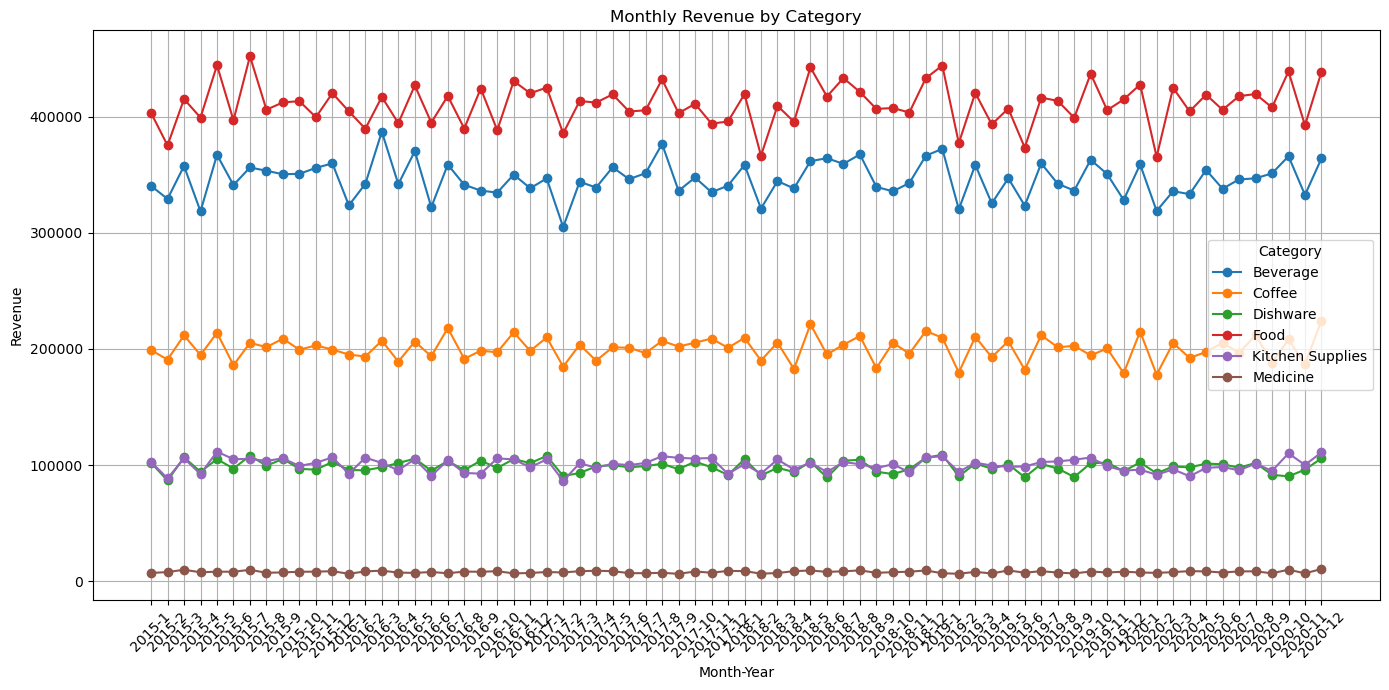

In [46]:
sales['date'] = pd.to_datetime(sales['date'])
sales['month'] = sales['date'].dt.month
sales['year'] = sales['date'].dt.year

print(sales['year'].unique())
# # Calculate revenue per entry
# sales['revenue'] = sales['quantity'] * sales['unit_price']

# Group by year, month, and category to get monthly revenue per category
monthly_revenue = sales.groupby(['year', 'month', 'category'])['total_price'].sum().reset_index()

# Pivot the table to have categories as columns
pivot_df = monthly_revenue.pivot_table(index=['year', 'month'], columns='category', values='total_price').fillna(0)

# Reset the index to have year and month as columns again
pivot_df.reset_index(inplace=True)

# Create a 'month-year' column for plotting
pivot_df['month-year'] = pivot_df['year'].astype(str) + '-' + pivot_df['month'].astype(str)

# Plotting
plt.figure(figsize=(14, 7))

# Loop through each category and plot
for category in pivot_df.columns[2:-1]:  # Exclude 'year', 'month', and 'month-year'
    plt.plot(pivot_df['month-year'], pivot_df[category], marker='o', label=category)

# Customize the plot
plt.title('Monthly Revenue by Category')
plt.xlabel('Month-Year')
plt.ylabel('Revenue')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

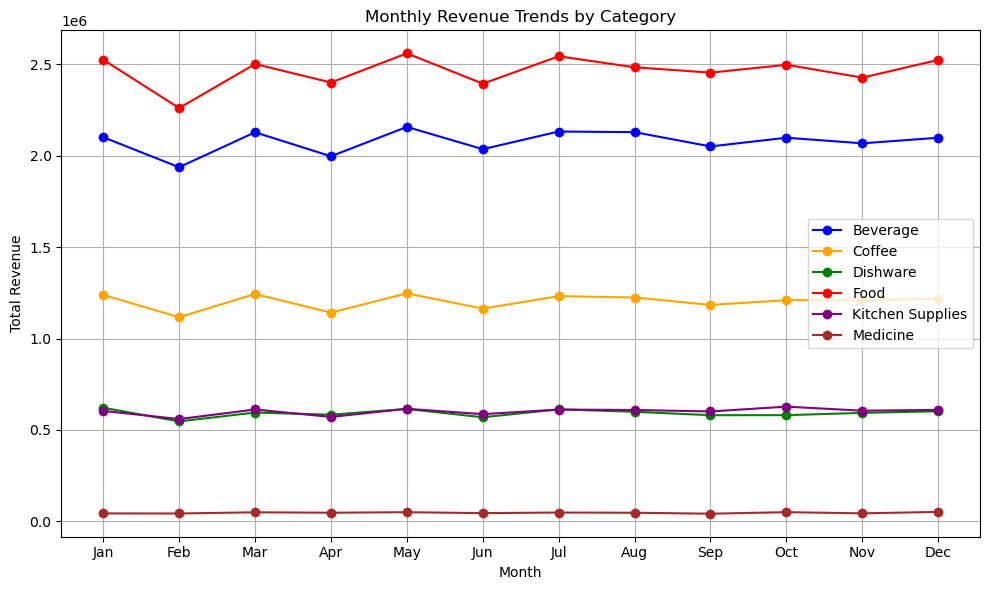

In [47]:
# Group by category and month, and calculate total revenue
category_month_revenue = sales.groupby(['category', 'month'])['total_price'].sum().reset_index()

# Create a separate plot for each category
plt.figure(figsize=(10, 6))

# Define colors for each category
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Plot revenue trends for each category
for i, (category, group) in enumerate(category_month_revenue.groupby('category')):
    plt.plot(group['month'], group['total_price'], marker='o', label=category, color=colors[i])

# Add labels, legend, and grid
plt.title("Monthly Revenue Trends by Category")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()








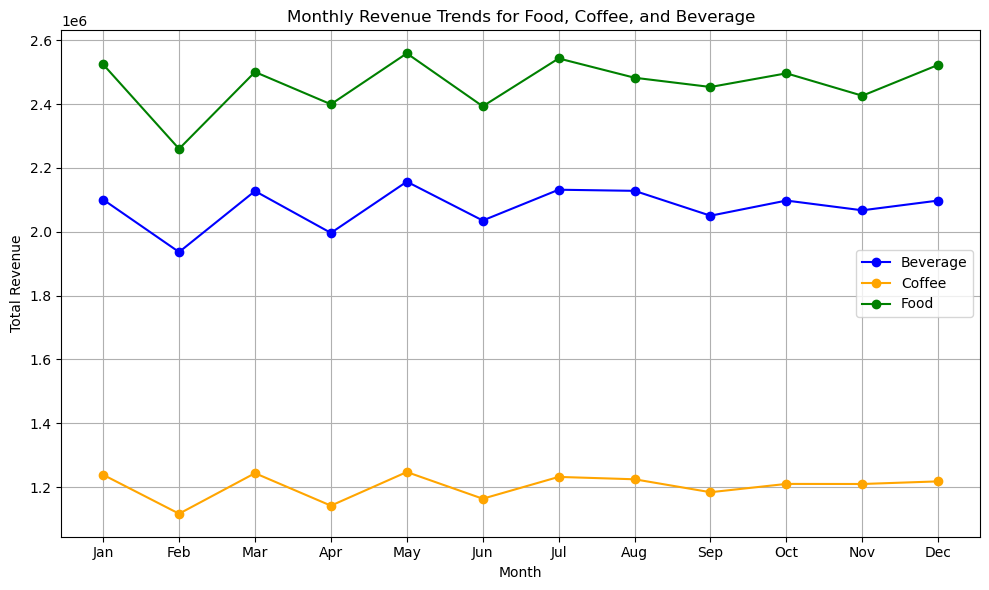

In [48]:
# Filter for specific categories 'Food', 'Coffee', and 'Beverage'
filtered_sales = sales[sales['category'].isin(['Food', 'Coffee', 'Beverage'])]

# Group by category and month, and calculate total revenue
category_month_revenue = filtered_sales.groupby(['category', 'month'])['total_price'].sum().reset_index()

# Create a separate plot for the filtered categories
plt.figure(figsize=(10, 6))

# Define colors for each category
colors = ['blue', 'orange', 'green']

# Plot revenue trends for each category
for i, (category, group) in enumerate(category_month_revenue.groupby('category')):
    plt.plot(group['month'], group['total_price'], marker='o', label=category, color=colors[i])

# Add labels, legend, and grid
plt.title("Monthly Revenue Trends for Food, Coffee, and Beverage")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

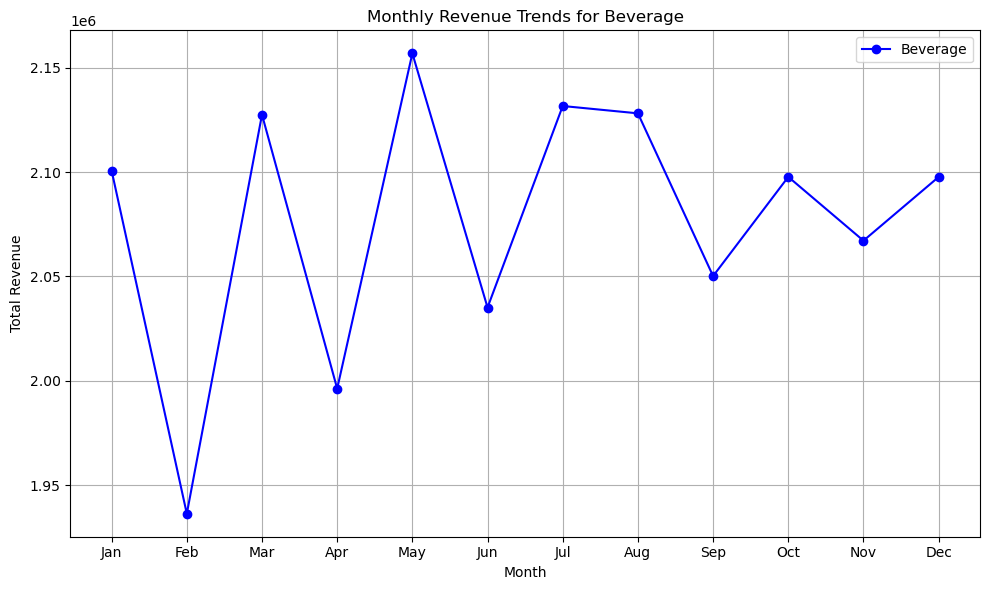

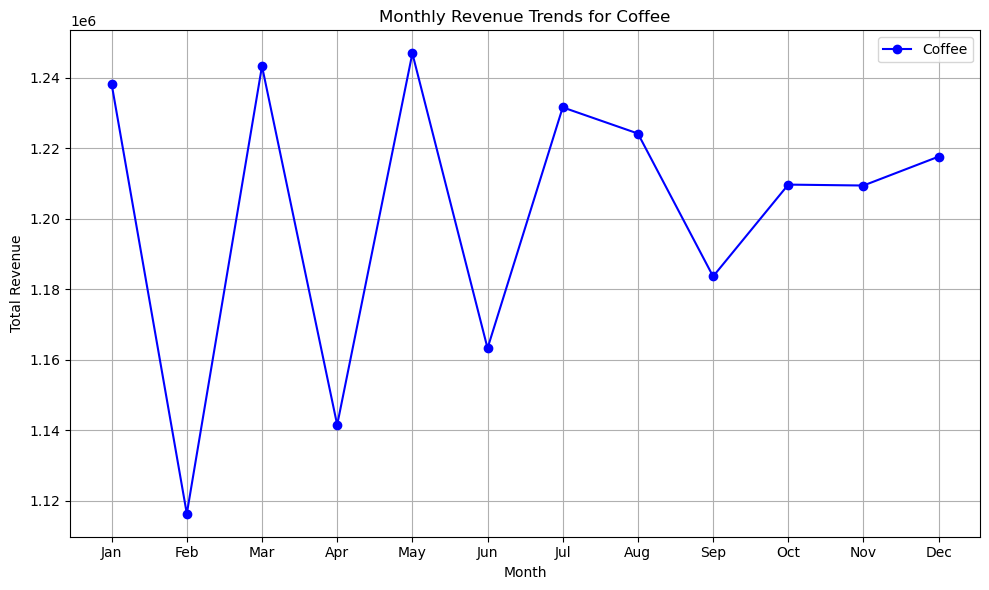

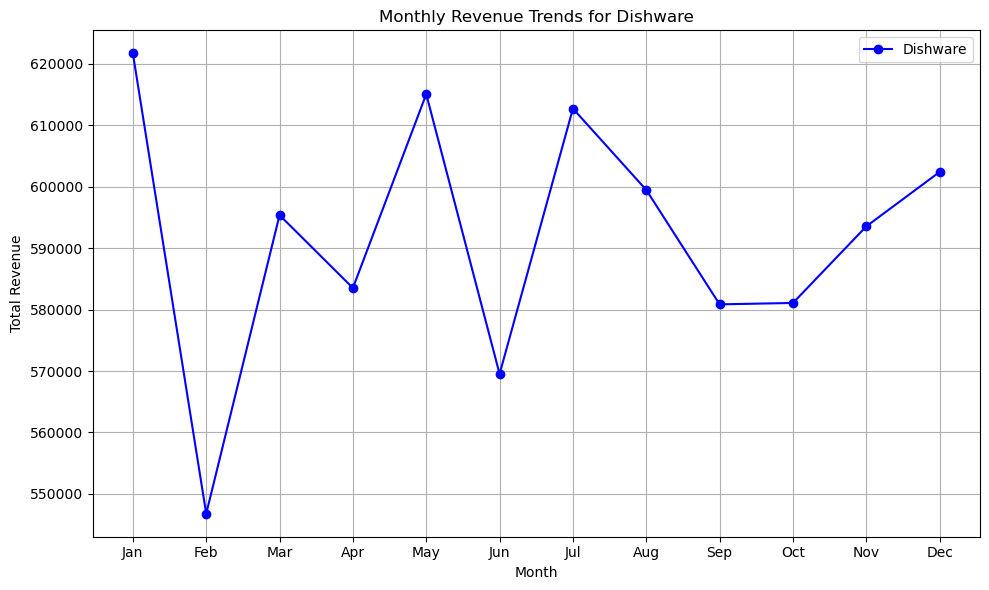

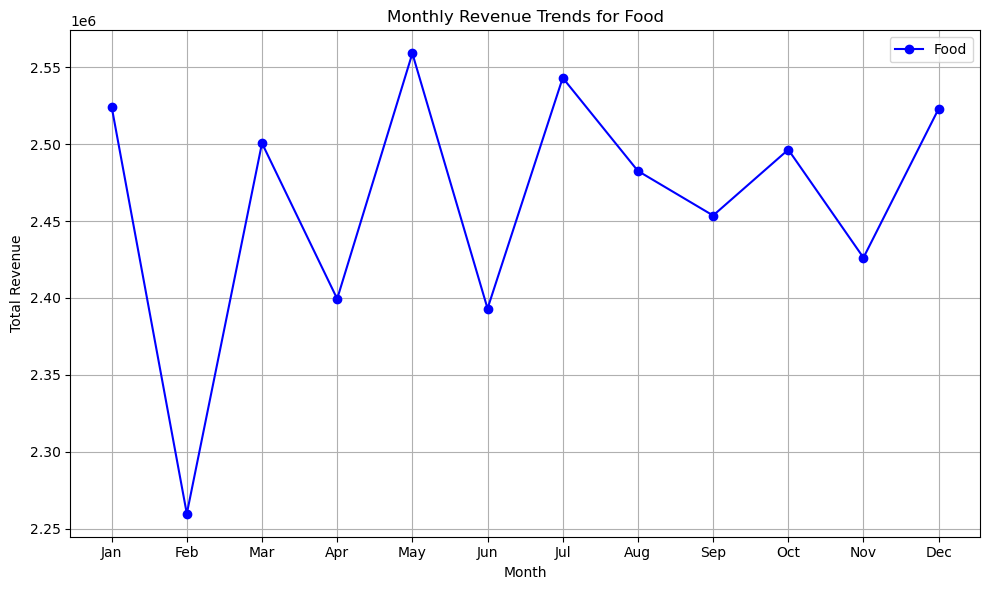

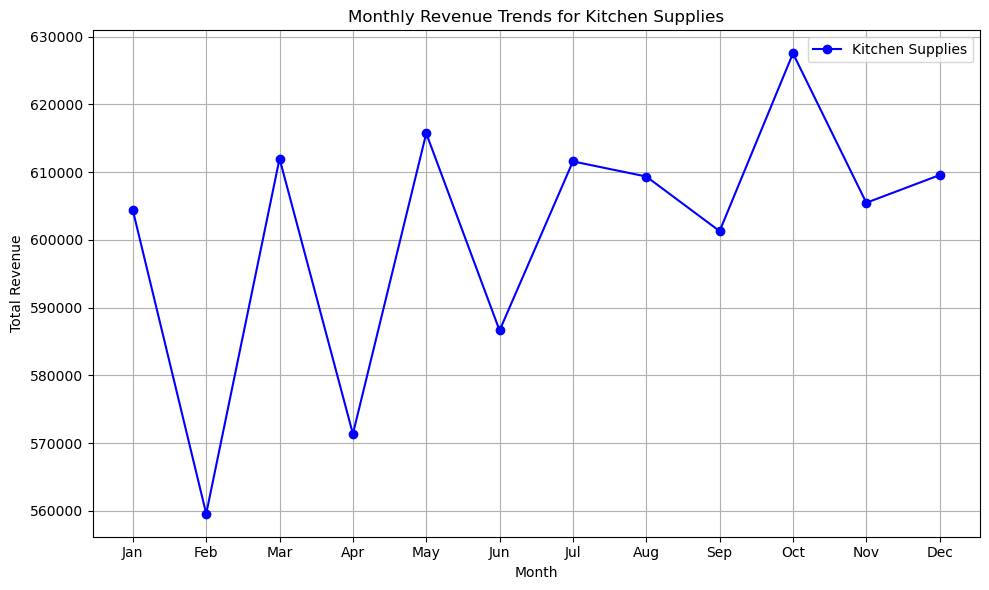

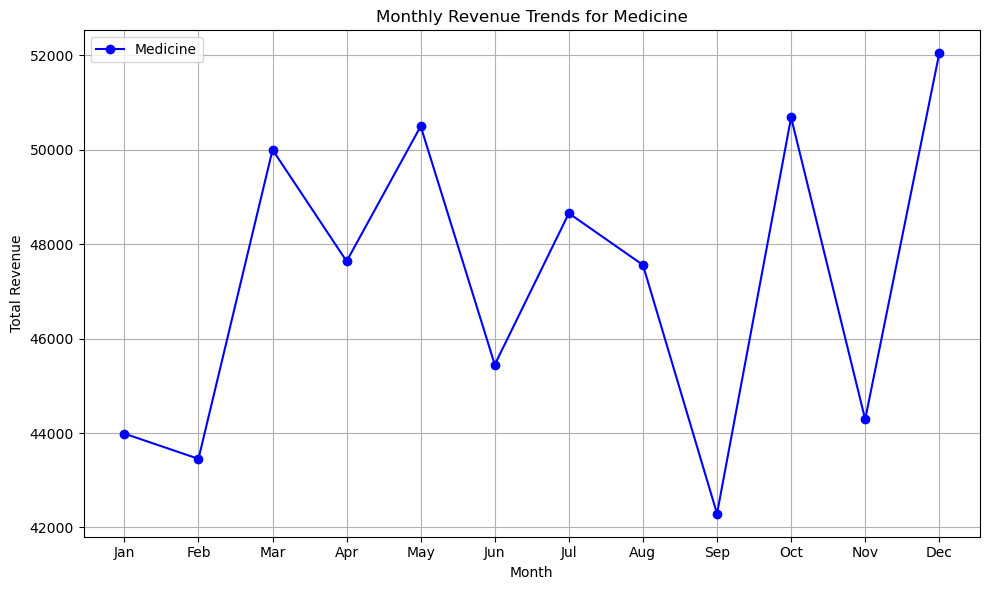

In [49]:

# Filter for specific categories 'Food', 'Coffee', and 'Beverage'
filtered_sales = sales[sales['category'].isin(['Food', 'Coffee', 'Beverage','Kitchen Supplies','Dishware','Medicine'])]

# Group by category and month, and calculate total revenue
category_month_revenue = filtered_sales.groupby(['category', 'month'])['total_price'].sum().reset_index()

# Get unique categories
categories = category_month_revenue['category'].unique()

# Plot each category in a separate graph
for category in categories:
    plt.figure(figsize=(10, 6))
    
    # Filter data for the current category
    category_data = category_month_revenue[category_month_revenue['category'] == category]
    
    # Plot revenue trend
    plt.plot(category_data['month'], category_data['total_price'], marker='o', label=category, color='blue')
    
    # Add labels, legend, and grid
    plt.title(f"Monthly Revenue Trends for {category}")
    plt.xlabel("Month")
    plt.ylabel("Total Revenue")
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

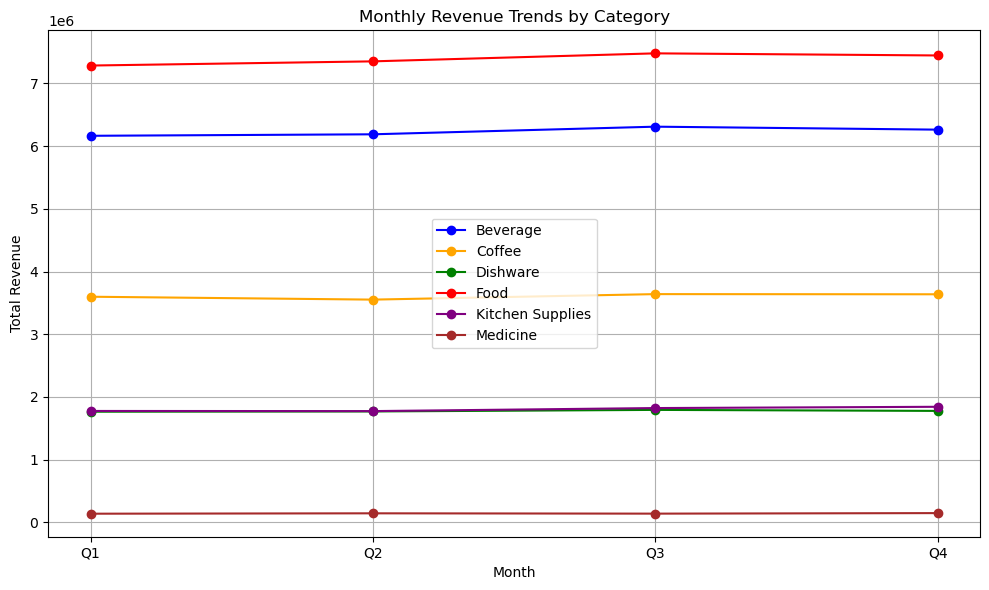

In [50]:
# Group by category and month, and calculate total revenue
category_month_revenue = sales.groupby(['category', 'quarter'])['total_price'].sum().reset_index()

# Create a separate plot for each category
plt.figure(figsize=(10, 6))

# Define colors for each category
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Plot revenue trends for each category
for i, (category, group) in enumerate(category_month_revenue.groupby('category')):
    plt.plot(group['quarter'], group['total_price'], marker='o', label=category, color=colors[i])

# Add labels, legend, and grid
plt.title("Monthly Revenue Trends by Category")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(range(0, 4), ['Q1','Q2','Q3','Q4'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




In [51]:
sales['month_string'] = sales['month'].astype(str)

In [52]:
sales_quarter = sales.groupby('quarter').agg({'month_string': ', '.join})
sales_quarter['month_string'] = sales_quarter['month_string'].apply(lambda x :set(x.split(', ')))

In [53]:
sales_quarter

# quarter 1: January, February, March 
# quarter 2: April, May, June 
# quarter 3: July, August, September 
# quarter 4: October, November, December

#obsevation: seasonality is overall trend, not specific category 
# reason: festival- higher consumption for food/beverage- also higher needs for dishware/kitchen supplies 
# can mostly focus on food/beverage/coffee- since they take large percentage of overall sales rvenue 
# possible avenues: 
# 1. gift pacakges, seasonal/festival related pacakges,specialty discounts (can be related to product bundling)
''' Weather-Responsive Promotions:
Hot Season (March to June): Promote cold beverages, ice creams, and light snacks. Run “summer refreshment” campaigns with attractive discounts on drinks and cooling products.
Monsoon Season (June to September): Focus on comfort foods, hot beverages, and indoor snacks. Highlight products that are ideal for monsoon weather.
'''
#Tailor the product assortment in each store or district to reflect the preferences and demographics of the local customer base.

# 2. sales/demand prediction (because of seasonality, predicable with time series)- maybe more of demand and inventory 

# 3. supplier: 
# art: optimization? 

# 4. location and district

' Weather-Responsive Promotions:\nHot Season (March to June): Promote cold beverages, ice creams, and light snacks. Run “summer refreshment” campaigns with attractive discounts on drinks and cooling products.\nMonsoon Season (June to September): Focus on comfort foods, hot beverages, and indoor snacks. Highlight products that are ideal for monsoon weather.\n'

In [54]:
# beverages sales: 
beverage_sales = sales[sales['category']=='Beverage']
beverage_sales

,quantity,unit,unit_price,total_price,item_name,desc,category,supplier,man_country,division,district,date,quarter,month,year,month_string
2,1,bottles,22.00,22.00,Premier Protein Shake Choc. 11oz,Beverage - Energy/Protein,Beverage,MAESA SAS,United States,DHAKA,DHAKA,2016-04-26 17:13:00,Q2,4,2016,4
20,6,cans,6.75,40.50,Sprite Zero - 12 pack,Beverage - Soda,Beverage,CHROMADURLIN S.A.S,poland,DHAKA,DHAKA,2015-03-10 19:10:00,Q1,3,2015,3
35,6,cans,6.75,40.50,Hawaiian Punch - 12 oz cans,Beverage - Soda,Beverage,Friedola 1888 GmbH,Germany,DHAKA,DHAKA,2018-07-04 04:27:00,Q3,7,2018,7
44,4,cans,55.00,220.00,Red Bull 12oz,Beverage - Energy/Protein,Beverage,MAESA SAS,United States,CHITTAGONG,CHITTAGONG,2015-05-03 21:58:00,Q2,5,2015,5
45,5,cans,6.75,33.75,Hawaiian Punch - 12 oz cans,Beverage - Soda,Beverage,Friedola 1888 GmbH,Germany,CHITTAGONG,KHAGRACHHARI,2015-05-03 21:58:00,Q2,5,2015,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920622,8,cans,6.75,54.00,Fuze Iced Tea,Beverage - Iced Tea,Beverage,CHROMADURLIN S.A.S,poland,DHAKA,NETRAKONA,2020-12-21 23:28:00,Q4,12,2020,12
920627,10,bottles,20.00,200.00,Gatorade X-Factor Fierce Variety 20 oz,Beverage - Gatorade,Beverage,NINGBO SEDUNO IMP & EXP CO.LTD,Cambodia,RAJSHAHI,PABNA,2016-10-05 07:19:00,Q4,10,2016,10
920629,6,bottles,17.00,102.00,Welch's 100% Juice Variety10 oz,Beverage - Juice,Beverage,NINGBO SEDUNO IMP & EXP CO.LTD,Cambodia,RAJSHAHI,RAJSHAHI,2018-09-25 18:31:00,Q3,9,2018,9
920640,2,cans,6.75,13.50,Diet Mountain Dew 12oz cans,Beverage - Soda,Beverage,HARDFORD AB,Finland,KHULNA,BAGERHAT,2019-07-18 11:05:00,Q3,7,2019,7


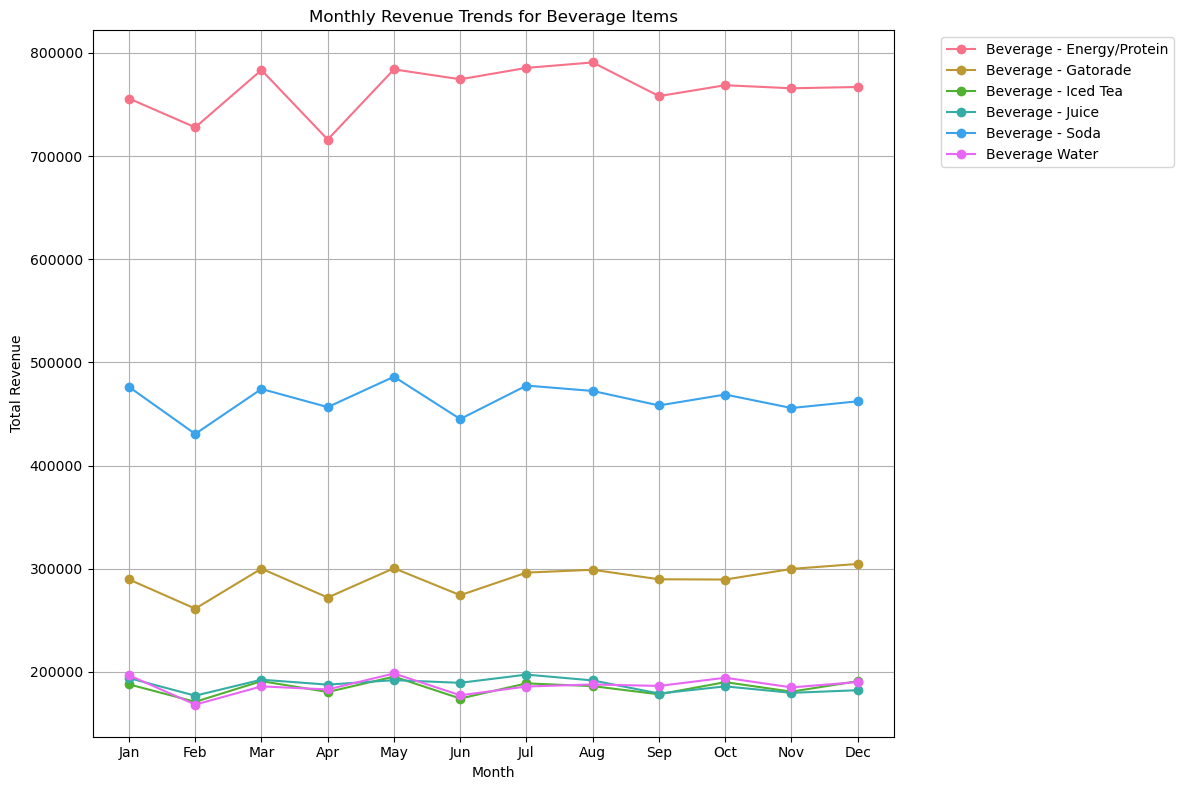

In [55]:

# Group by 'desc' and 'month' to calculate total revenue for each beverage item per month
desc_month_revenue = beverage_sales.groupby(['desc', 'month'])['total_price'].sum().reset_index()

# Set up the plot
plt.figure(figsize=(12, 8))

# Define a list of unique colors for each beverage item
colors = sns.color_palette('husl', n_colors=len(desc_month_revenue['desc'].unique()))

# Plot revenue trends for each beverage item
for i, (desc, group) in enumerate(desc_month_revenue.groupby('desc')):
    plt.plot(group['month'], group['total_price'], marker='o', label=desc, color=colors[i])

# Add labels, legend, and grid
plt.title('Monthly Revenue Trends for Beverage Items')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

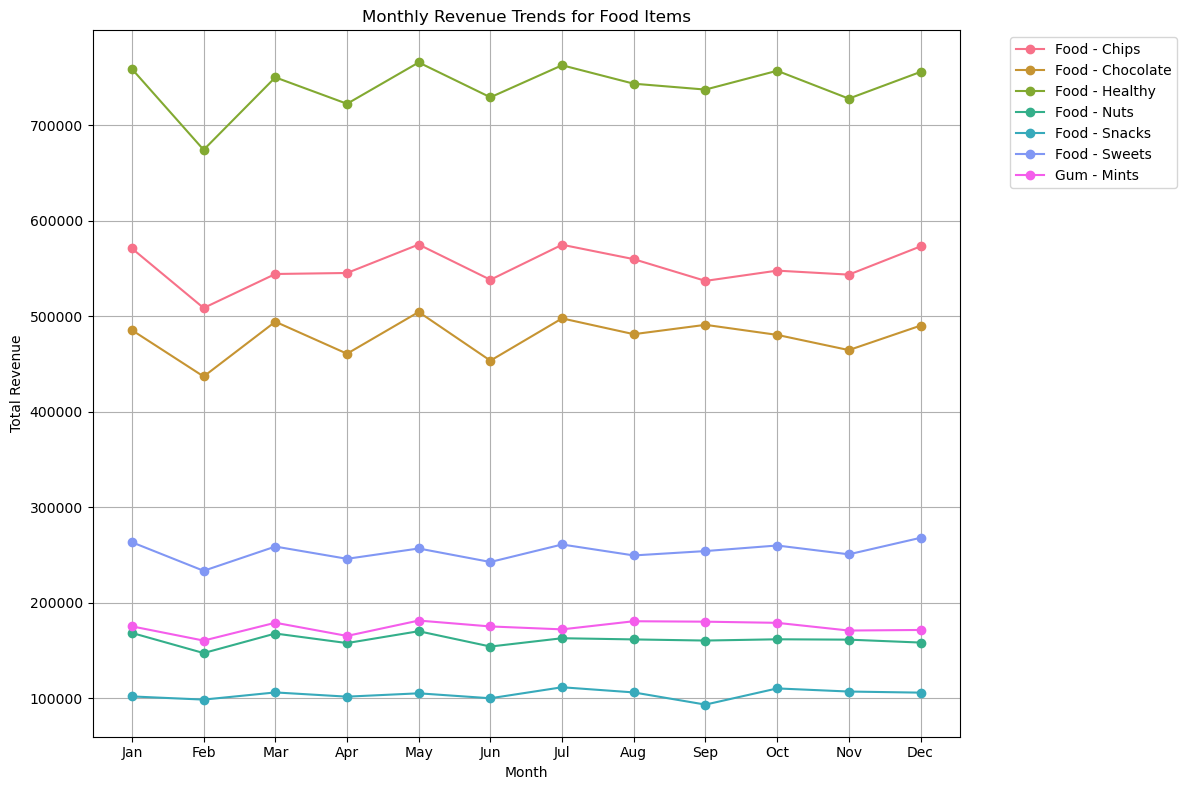

In [56]:
# food sales 
food_sales = sales[sales['category']=='Food']

# Group by 'desc' and 'month' to calculate total revenue for each beverage item per month
desc_month_revenue = food_sales.groupby(['desc', 'month'])['total_price'].sum().reset_index()

# Set up the plot
plt.figure(figsize=(12, 8))

# Define a list of unique colors for each beverage item
colors = sns.color_palette('husl', n_colors=len(desc_month_revenue['desc'].unique()))

# Plot revenue trends for each beverage item
for i, (desc, group) in enumerate(desc_month_revenue.groupby('desc')):
    plt.plot(group['month'], group['total_price'], marker='o', label=desc, color=colors[i])

# Add labels, legend, and grid
plt.title('Monthly Revenue Trends for Food Items')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

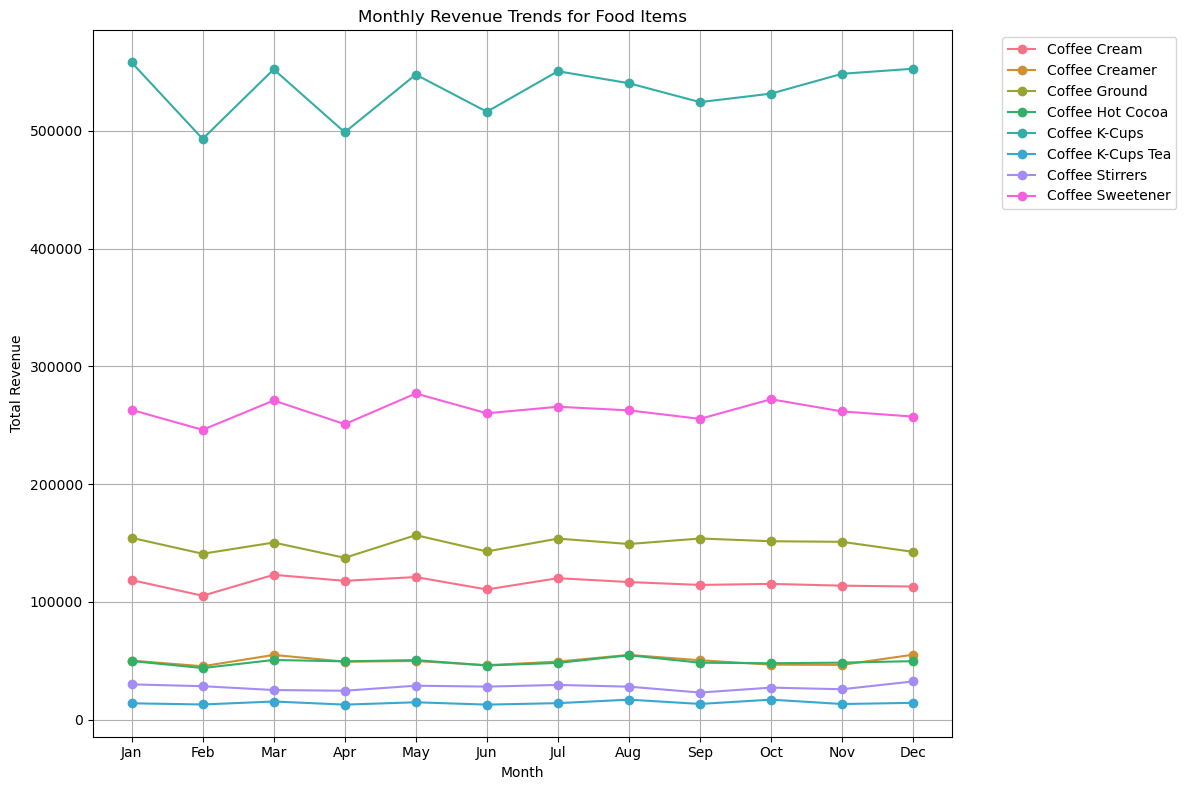

In [57]:
# coffee sales 
coffee_sales = sales[sales['category']=='Coffee']

# Group by 'desc' and 'month' to calculate total revenue for each beverage item per month
desc_month_revenue = coffee_sales.groupby(['desc', 'month'])['total_price'].sum().reset_index()

# Set up the plot
plt.figure(figsize=(12, 8))

# Define a list of unique colors for each beverage item
colors = sns.color_palette('husl', n_colors=len(desc_month_revenue['desc'].unique()))

# Plot revenue trends for each beverage item
for i, (desc, group) in enumerate(desc_month_revenue.groupby('desc')):
    plt.plot(group['month'], group['total_price'], marker='o', label=desc, color=colors[i])

# Add labels, legend, and grid
plt.title('Monthly Revenue Trends for Food Items')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [58]:
store_df.columns

Index(['store_key', 'division', 'district', 'upazila'], dtype='object')

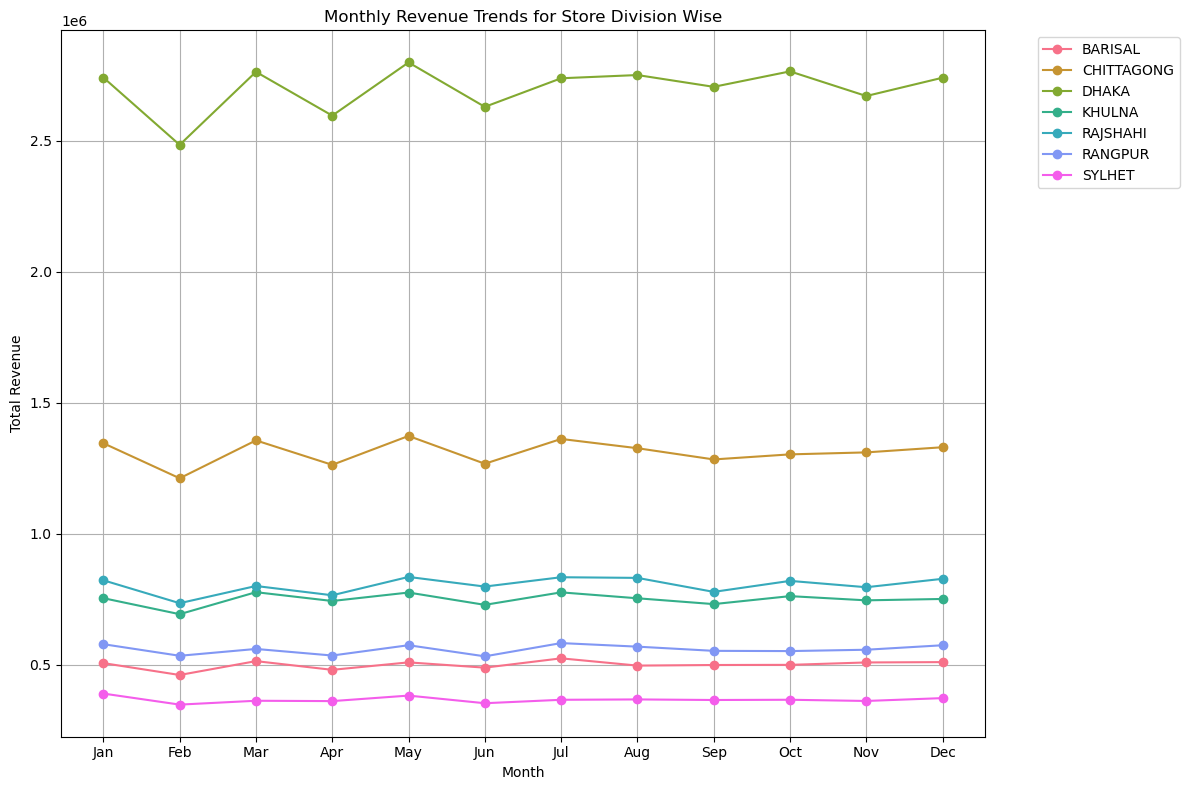

In [59]:
# Group by 'division' and 'month' to calculate total revenue for each division per month
sales_division = sales.groupby(['division', 'month']).sum(numeric_only=True).reset_index()

# Set up the plot
plt.figure(figsize=(12, 8))

# Define a list of unique colors for each division
colors = sns.color_palette('husl', n_colors=len(sales_division['division'].unique()))

# Plot revenue trends for each division
for i, (division, group) in enumerate(sales_division.groupby('division')):
    plt.plot(group['month'], group['total_price'], marker='o', label=division, color=colors[i])

# Add labels, legend, and grid
plt.title('Monthly Revenue Trends for Store Division Wise')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\CiciA\AppData\Local\Temp\ipykernel_46352\2000767931.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  division_data['proportion'] = division_data['total_price'] / total_revenue
C:\Users\CiciA\AppData\Local\Temp\ipykernel_46352\2000767931.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  division_data['proportion'] = division_data['total_price'] / total_revenue
C:\Users\CiciA\AppData\Local\Temp\ipykernel_46352\2000767931.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

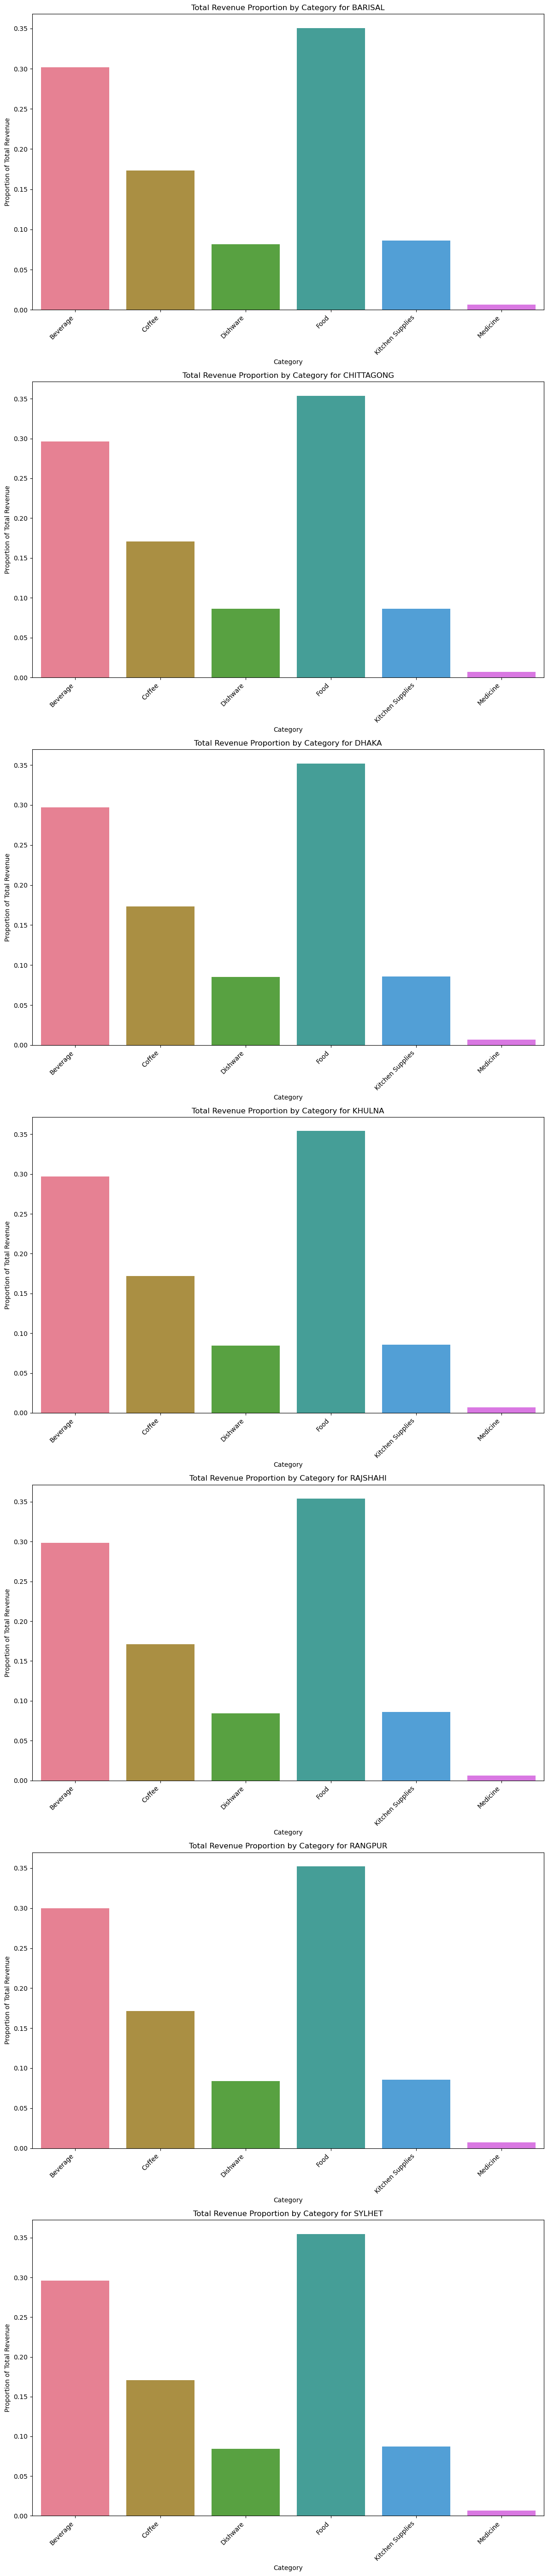

In [60]:
# Group by 'division' and 'category' to calculate total revenue for each division and category
division_category_revenue = sales.groupby(['division', 'category'])['total_price'].sum().reset_index()

# Get unique divisions
divisions = division_category_revenue['division'].unique()

# Set up subplots based on the number of unique divisions
num_plots = len(divisions)
fig, axes = plt.subplots(num_plots, 1, figsize=(12, 8*num_plots))

# Iterate over each division and create a plot
for i, division in enumerate(divisions):
    # Filter data for the current division
    division_data = division_category_revenue[division_category_revenue['division'] == division]
    
    # Calculate total revenue for the current division
    total_revenue = division_data['total_price'].sum()
    
    # Calculate proportion of revenue for each category within the current division
    division_data['proportion'] = division_data['total_price'] / total_revenue
    
    # Plot total revenue by category
    sns.barplot(x='category', y='proportion', data=division_data, ax=axes[i], palette='husl')
    axes[i].set_title(f'Total Revenue Proportion by Category for {division}')
    axes[i].set_xlabel('Category')
    axes[i].set_ylabel('Proportion of Total Revenue')
    axes[i].set_xticklabels(division_data['category'], rotation=45, ha='right')

# Adjust layout and display plots
plt.tight_layout()
plt.show()

In [61]:
divisions

array(['BARISAL', 'CHITTAGONG', 'DHAKA', 'KHULNA', 'RAJSHAHI', 'RANGPUR',
       'SYLHET'], dtype=object)

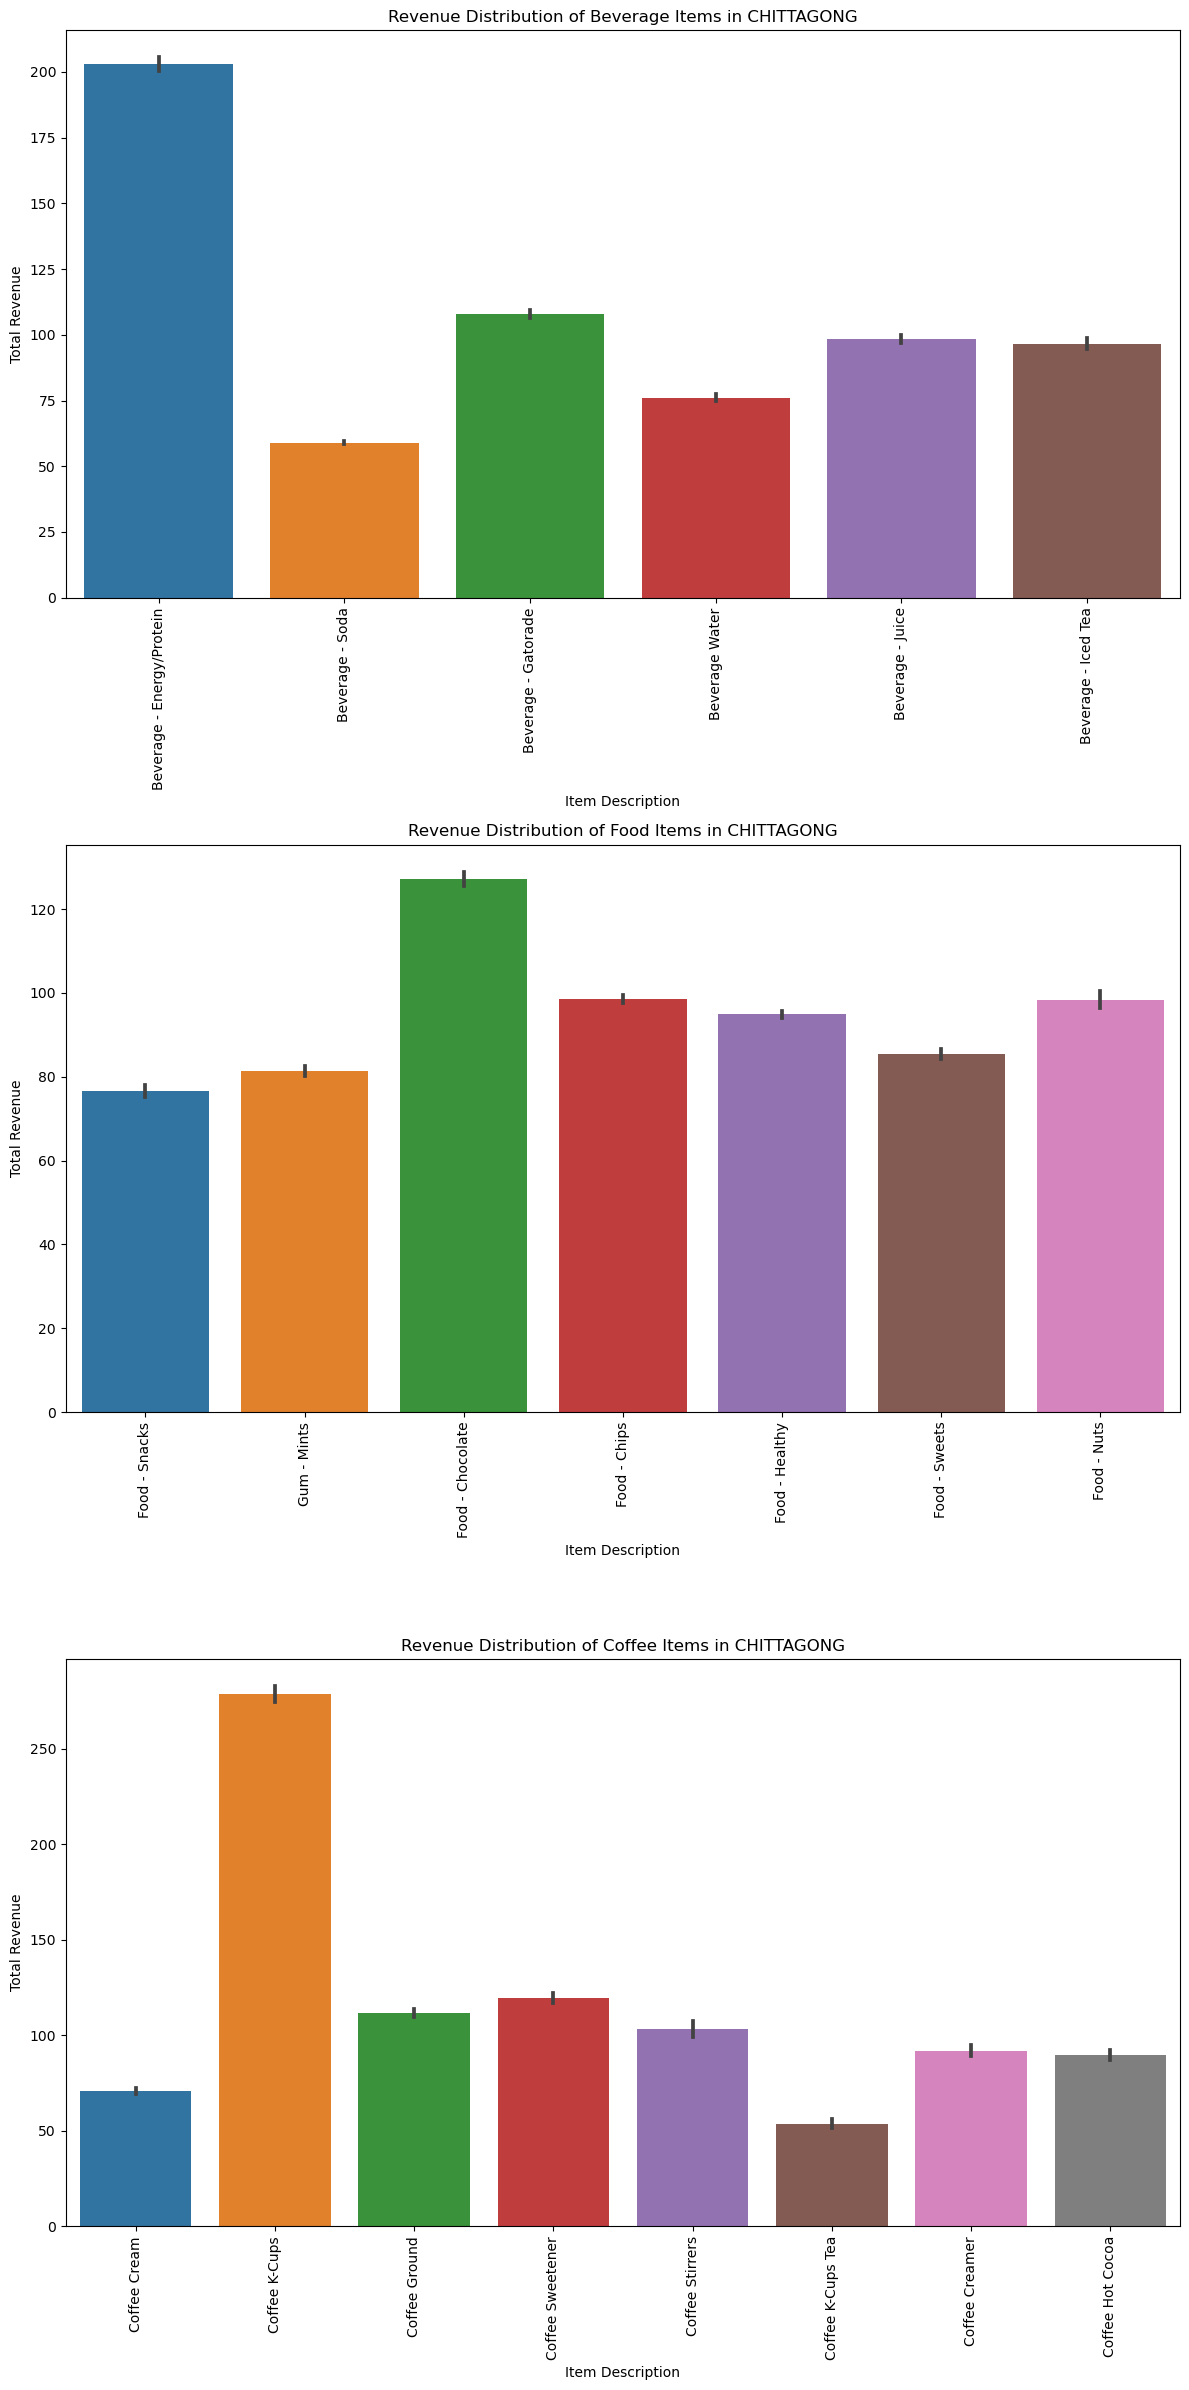

In [62]:
# Filter data for the division CHITTAGONG
division_data = sales[sales['division'] == 'CHITTAGONG']

# Filter data for each category: beverage, food, coffee
beverage_data = division_data[division_data['category'] == 'Beverage']
food_data = division_data[division_data['category'] == 'Food']
coffee_data = division_data[division_data['category'] == 'Coffee']

# Set up subplots for each category
fig, axes = plt.subplots(3, 1, figsize=(12, 24))

# Plot revenue distribution for beverage category
sns.barplot(x='desc', y='total_price', data=beverage_data, ax=axes[0])
axes[0].set_title('Revenue Distribution of Beverage Items in CHITTAGONG')
axes[0].set_xlabel('Item Description')
axes[0].set_ylabel('Total Revenue')
axes[0].tick_params(axis='x', rotation=90)

# Plot revenue distribution for food category
sns.barplot(x='desc', y='total_price', data=food_data, ax=axes[1])
axes[1].set_title('Revenue Distribution of Food Items in CHITTAGONG')
axes[1].set_xlabel('Item Description')
axes[1].set_ylabel('Total Revenue')
axes[1].tick_params(axis='x', rotation=90)

# Plot revenue distribution for coffee category
sns.barplot(x='desc', y='total_price', data=coffee_data, ax=axes[2])
axes[2].set_title('Revenue Distribution of Coffee Items in CHITTAGONG')
axes[2].set_xlabel('Item Description')
axes[2].set_ylabel('Total Revenue')
axes[2].tick_params(axis='x', rotation=90)

# Adjust layout and display plots
plt.tight_layout()
plt.show()

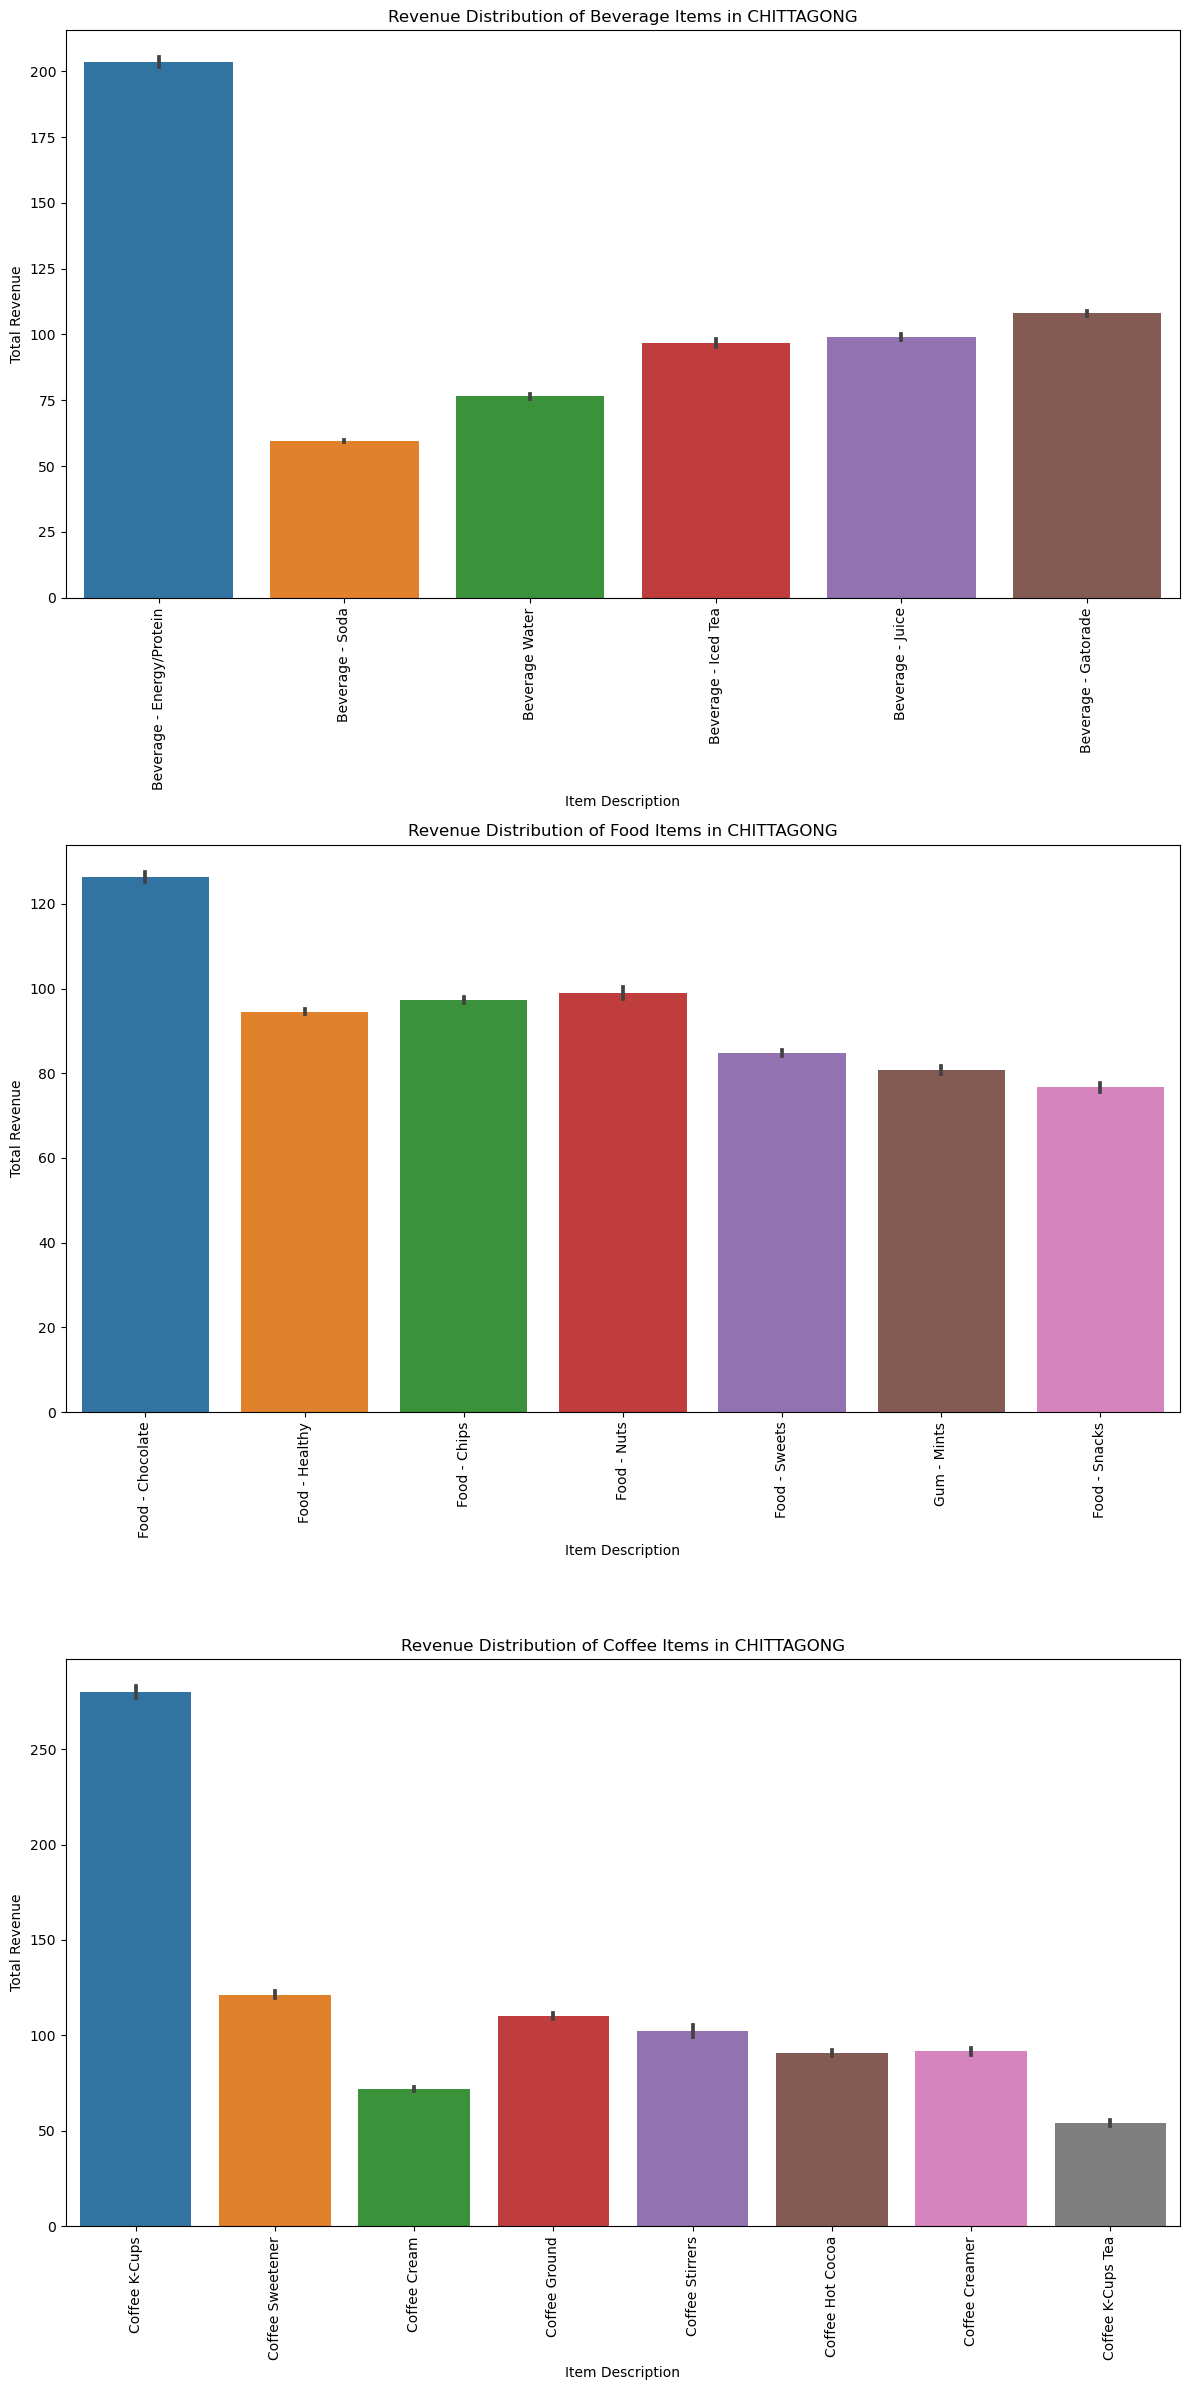

In [63]:
# Filter data for the division CHITTAGONG
division_data = sales[sales['division'] == 'DHAKA']

# Filter data for each category: beverage, food, coffee
beverage_data = division_data[division_data['category'] == 'Beverage']
food_data = division_data[division_data['category'] == 'Food']
coffee_data = division_data[division_data['category'] == 'Coffee']

# Set up subplots for each category
fig, axes = plt.subplots(3, 1, figsize=(12, 24))

# Plot revenue distribution for beverage category
sns.barplot(x='desc', y='total_price', data=beverage_data, ax=axes[0])
axes[0].set_title('Revenue Distribution of Beverage Items in CHITTAGONG')
axes[0].set_xlabel('Item Description')
axes[0].set_ylabel('Total Revenue')
axes[0].tick_params(axis='x', rotation=90)

# Plot revenue distribution for food category
sns.barplot(x='desc', y='total_price', data=food_data, ax=axes[1])
axes[1].set_title('Revenue Distribution of Food Items in CHITTAGONG')
axes[1].set_xlabel('Item Description')
axes[1].set_ylabel('Total Revenue')
axes[1].tick_params(axis='x', rotation=90)

# Plot revenue distribution for coffee category
sns.barplot(x='desc', y='total_price', data=coffee_data, ax=axes[2])
axes[2].set_title('Revenue Distribution of Coffee Items in CHITTAGONG')
axes[2].set_xlabel('Item Description')
axes[2].set_ylabel('Total Revenue')
axes[2].tick_params(axis='x', rotation=90)

# Adjust layout and display plots
plt.tight_layout()
plt.show()

In [64]:
sales.head()

,quantity,unit,unit_price,total_price,item_name,desc,category,supplier,man_country,division,district,date,quarter,month,year,month_string
0,1,ct,35.0,35.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,Food,Bolsius Boxmeer,Netherlands,DHAKA,JAMALPUR,2016-04-26 17:13:00,Q2,4,2016,4
1,2,tubs,15.0,30.0,French Vanilla International Delight,Coffee Cream,Coffee,Friedola 1888 GmbH,Germany,CHITTAGONG,BANDARBAN,2016-04-26 17:13:00,Q2,4,2016,4
2,1,bottles,22.0,22.0,Premier Protein Shake Choc. 11oz,Beverage - Energy/Protein,Beverage,MAESA SAS,United States,DHAKA,DHAKA,2016-04-26 17:13:00,Q2,4,2016,4
3,7,ct,35.0,245.0,M&M Peanut Candy 1.7 oz,Food - Chocolate,Food,Bolsius Boxmeer,Netherlands,DHAKA,JAMALPUR,2014-04-05 03:27:00,Q2,4,2014,4
4,1,ct,21.0,21.0,Large Trash Bags Black 33 gal,Kitchen Supplies,Kitchen Supplies,DENIMACH LTD,Bangladesh,DHAKA,NETRAKONA,2014-04-05 03:27:00,Q2,4,2014,4


In [65]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Assuming the sales dataframe is named 'sales'
# Map products to their corresponding suppliers
product_supplier_mapping = sales.groupby('item_name')['supplier'].first().to_dict()

# Filter transactions to include only products from the same supplier
transaction_list_filtered = sales.groupby('supplier')['item_name'].apply(list).tolist()

# Use TransactionEncoder to transform the transaction list into a one-hot encoded DataFrame
te = TransactionEncoder()
transaction_array = te.fit(transaction_list_filtered).transform(transaction_list_filtered)
transaction_df_encoded = pd.DataFrame(transaction_array, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(transaction_df_encoded, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Filter rules to include only those with products from the same supplier
def same_supplier(items, supplier_map):
    return all(supplier_map[item] == supplier_map[next(iter(items))] for item in items)

rules_same_supplier = rules[rules['antecedents'].apply(lambda x: same_supplier(x, product_supplier_mapping))
                             & rules['consequents'].apply(lambda x: same_supplier(x, product_supplier_mapping))]

# Display the resulting product bundles
print(rules_same_supplier[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

KeyboardInterrupt: 

In [66]:
#implementing supplier-based bundling by filtering the association rules to include only those with products from the same supplier

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Assuming the sales dataframe is named 'sales'
# Map products to their corresponding suppliers
product_supplier_mapping = sales.groupby('item_name')['supplier'].first().to_dict()

# Filter transactions to include only products from the same supplier
transaction_list_filtered = sales.groupby('supplier')['item_name'].apply(list).tolist()

# Use TransactionEncoder to transform the transaction list into a one-hot encoded DataFrame
te = TransactionEncoder()
transaction_array = te.fit(transaction_list_filtered).transform(transaction_list_filtered)
transaction_df_encoded = pd.DataFrame(transaction_array, columns=te.columns_)


In [67]:
transaction_df_encoded

,100% Juice Box Variety 6.75 oz,A&W Root Beer - 12 oz cans,A&W Root Beer Diet - 12 oz cans,Advil 2 pill packets,All Purpose Cleaner 409 Spray,Altoids Small Packs Variety,Apple Sauce Variety GoGO Squeeze 3.2oz,AquaFina Purified Drinking Water 16oz,Austin Cookie Cracker Variety,Austin Toasty Crackers w/ PBtr,...,Unsalted Premium Blend Nuts,V-8 Splash Variety 20 oz,V8 100% Vegetable Juice 11oz cans,Veggie Chips 1oz,Vita Coconut Water 10oz,Welch's 100% Juice Variety10 oz,Wint O Green LifeSavers Sugar Free,Wonderful Pistachios (in shell),Yoplait Original Yogurt Variety Pack,Zoo Animal Cookies/Crackers
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,True,...,False,True,False,False,False,False,False,True,False,False
3,False,False,True,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,True,True,False,...,True,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [85]:
# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(transaction_df_encoded, min_support=0.01, use_colnames=True)


MemoryError: cannot allocate array memory

In [70]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

In [73]:
# Filter rules to include only those with products from the same supplier
def same_supplier(items, supplier_map):
    suppliers = {supplier_map[item] for item in items}
    return len(suppliers) == 1

# Filter rules using vectorized approach for better performance
antecedent_suppliers = rules['antecedents'].apply(lambda x: {product_supplier_mapping[item] for item in x})
consequent_suppliers = rules['consequents'].apply(lambda x: {product_supplier_mapping[item] for item in x})

rules_same_supplier = rules[(antecedent_suppliers.apply(len) == 1) & (consequent_suppliers.apply(len) == 1)]

# Display the resulting product bundles
print(rules_same_supplier[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                                             antecedents  \
0                      (100% Juice Box Variety 6.75 oz )   
1                                 (Advil 2 pill packets)   
2                              (Coke Classic 12 oz cans)   
3                      (100% Juice Box Variety 6.75 oz )   
4                      (100% Juice Box Variety 6.75 oz )   
...                                                  ...   
22702                          (Coke Classic 12 oz cans)   
22709  (Baked Chips Variety Mix Frito, Cheez It White...   
22956                          (Coke Classic 12 oz cans)   
22963  (Baked Chips Variety Mix Frito, Apple Sauce Va...   
23466                          (Coke Classic 12 oz cans)   

                                             consequents  support  confidence  \
0                                 (Advil 2 pill packets)      0.1         1.0   
1                      (100% Juice Box Variety 6.75 oz )      0.1         1.0   
2                      (100% Juice B

In [81]:
bundles = rules_same_supplier['consequents']
bundles.unique()

array([frozenset({'Advil 2 pill packets'}),
       frozenset({'100% Juice Box Variety 6.75 oz '}),
       frozenset({'Coke Classic 12 oz cans'}),
       frozenset({'Dawn Ultra Dish Detergent, Original Scent '}),
       frozenset({'A&W Root Beer - 12 oz cans'}),
       frozenset({'Belvita Hard Biscuits Cinnamon'}),
       frozenset({'Blue Diamond Almonds Rstd, Sltd'}),
       frozenset({'Cherry Coke 12oz'}),
       frozenset({'Coffee-mate Original Powdered Creamer'}),
       frozenset({'Detour Lower Sugar Protein Bar'}),
       frozenset({'All Purpose Cleaner 409 Spray'}),
       frozenset({'A&W Root Beer Diet - 12 oz cans'}),
       frozenset({'Belvita Protein Oats Soft Biscuit'}),
       frozenset({'Cheez It Original Crackers 1.5oz'}),
       frozenset({'Chewy Granola Variety Bars Quaker'}),
       frozenset({'Altoids Small Packs Variety'}),
       frozenset({'Austin Toasty Crackers w/ PBtr'}),
       frozenset({'Clorox Bleach Large Jugs'}),
       frozenset({'Apple Sauce Variety GoGO

In [83]:
item_df[item_df['item_name']=='Austin Toasty Crackers w/ PBtr']

,item_key,item_name,desc,unit_price,man_country,supplier,unit,category
220,I00221,Austin Toasty Crackers w/ PBtr,Food - Snacks,14.0,China,"CHERRY GROUP CO.,LTD",ct,Food


In [84]:
item_df[item_df['item_name']=='Altoids Small Packs Variety']


,item_key,item_name,desc,unit_price,man_country,supplier,unit,category
235,I00236,Altoids Small Packs Variety,Gum - Mints,12.0,China,"CHERRY GROUP CO.,LTD",tins,Food


In [ ]:

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(transaction_df_encoded, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Filter rules to include only those with products from the same supplier
def same_supplier(items, supplier_map):
    suppliers = {supplier_map[item] for item in items}
    return len(suppliers) == 1

# Filter rules using vectorized approach for better performance
antecedent_suppliers = rules['antecedents'].apply(lambda x: {product_supplier_mapping[item] for item in x})
consequent_suppliers = rules['consequents'].apply(lambda x: {product_supplier_mapping[item] for item in x})

rules_same_supplier = rules[antecedent_suppliers.apply(len) == 1 & consequent_suppliers.apply(len) == 1]

# Display the resulting product bundles
print(rules_same_supplier[['antecedents', 'consequents', 'support', 'confidence', 'lift']])